# Trabajo 2 Opcional

 - Máster en Ciencia de Datos y Aprendizaje Automático.
 - Asignatura: Preparación de Datos.
 - Trabajo realizado por: Pablo Ascorbe e Ignacio Marco.
 - Fecha: --/01/2023.

## 1. Lectura y análisis del dataset

En este primer apartado importaremos los datos y haremos un estudio inicial de estos.
Los datos forman parte del [Best Books Ever Dataset](https://zenodo.org/record/4265096#.Y7vcdBXMLct), que contiene información sobre obras populares de literatura publicadas en la web [Good Reads](https://www.goodreads.com), para las que se registran los detalles de la obra y su edición, el autor o autora, los premios obtenidos y sus puntuaciones en distinas clasificaciones. Este dataset contiene un total de 52.407 registros y 25 variables que requieren un preprocesado relativamente exigente.

Como contextualización, trasladamos la descripción de las variables del dataset:

* *bookId*: Identificador de la obra dentro de la web Good Reads.
* *title*: Título de la obra.
* *series*: Título de la serie en la que se enmarca la obra.
* *author*: Nombre del autor o la autora.
* *rating*: Valoración global dentro de Good Reads por los usuarios.
* *description*: Anotaciones en el registro.
* *language*: Idioma en el que está escrita la obra
* *isbn*: ISBN (identificador estándar) de la obra.
* *genres*: Lista de géneros de la obra.
* *characters*: Lista de personajes principales de la obra.
* *bookFormat*: Formato de la obra (de tapa dura, de tapa blanda, digital, etc.)
* *edition*: Edición de la obra.
* *pages*: Número de páginas.
* *publisher*: Editorial que publicó la edición de la obra.
* *publishDate*: Fecha de publicación de la edición.
* *firstPublishDate*: Fecha de publicación de la obra.
* *awards*: Lista de premios recibidos por la obra reconocidos por Good Reads.
* *numRatings*: Número de valoraciones por parte de los usuarios de Good Reads.
* *ratingByStars*: Lista de los 5 números de valoraciones de los usuarios de Good Reads, correspondientes a las 5 posibles puntuaciones.
* *likedPercent*: Porcentaje de los usuarios que han emitido una evaluación positiva en Good Reads.
* *setting*: Colección de ubicaciones en las que transcurren los acontecimientos de la obra.
* *coverImg*: Enlace a la imagen de portada subida a Good Reads.
* *bbeScore*: Evaluación de la obra en la lista [Best Books Ever](https://www.goodreads.com/list/show/1.Best_Books_Ever).
* *bbeVotes*: Número de evaluaciones en la lista [Best Books Ever](https://www.goodreads.com/list/show/1.Best_Books_Ever).
* *price*: Precio de venta en la página.

### 1.1. Importación de datos

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('libros.csv', header=0, dtype=object)
print(df.shape)

(52478, 25)


Vemos que tenemos demasiadas instancias y que podría estar bien reducir un poco para simplificar, pero de momento vamos a seguir con todas.

In [3]:
df.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


In [4]:
df.tail()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
52473,11492014-fractured,Fractured,Fateful #2,Cheri Schmidt (Goodreads Author),4.00,The Fateful Trilogy continues with Fractured. ...,English,2940012616562,"['Vampires', 'Paranormal', 'Young Adult', 'Rom...",[],...,NaN,[],871,"['311', '310', '197', '42', '11']",94,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52474,11836711-anasazi,Anasazi,Sense of Truth #2,Emma Michaels,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...",English,9999999999999,"['Mystery', 'Young Adult']",[],...,August 3rd 2011,[],37,"['16', '14', '5', '2', '0']",95,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52475,10815662-marked,Marked,Soul Guardians #1,Kim Richardson (Goodreads Author),3.70,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,English,9781461017097,"['Fantasy', 'Young Adult', 'Paranormal', 'Ange...",[],...,March 15th 2011,"[""Readers' Favorite Book Award (2011)""]",6674,"['2109', '1868', '1660', '647', '390']",84,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,7.37
52476,11330278-wayward-son,Wayward Son,NaN,"Tom Pollack (Goodreads Author), John Loftus (G...",3.85,A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,English,9781450755634,"['Fiction', 'Mystery', 'Historical Fiction', '...",[],...,April 5th 2011,[],238,"['77', '78', '59', '19', '5']",90,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,2.86
52477,10991547-daughter-of-helaman,Daughter of Helaman,Stripling Warrior #1,Misty Moncur (Goodreads Author),4.02,Fighting in Helaman's army is Keturah's deepes...,English,9781599554976,"['Lds Fiction', 'Historical Fiction', 'Young A...",[],...,NaN,[],246,"['106', '73', '42', '17', '8']",90,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,5.20


Vemos que las últimas instancias del dataframe contienen un formato de fechas distintas a las primeras.

Ya con esta primera visualización de los datos vemos que tenemos nulos y que hay columnas que no nos van a interesar para nada, como la imagen de la portada o el ISBN.

Otra duda es, ¿qué variable será la explicada?, ¿cuál usaremos como objetivo? Esto es totalmente libre y puede variar según nuestros intereses; como parece interesante determinar la puntuación de cada libro para poder predecir qué tan valorado será un libro concreto, nos quedaremos con 'rating'. 

In [5]:
# Separamos explicativas de explicada

X, y = df.drop('rating', axis=1), df.rating
print(X.shape, y.shape)

(52478, 24) (52478,)


In [6]:
X.head()

,bookId,title,series,author,description,language,isbn,genres,characters,bookFormat,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",Paperback,...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


### 1.2. Estudio inicial del dataset

Como comentabamos, hay una serie de columnas que desde el comienzo no nos interesan; estas son: la URL de la portada, el ISBN, el identificador del libro, su título, la serie de la que viene y la descripción. De momento, eliminamos estas porque además de ser variables únicas, ya que casi todas son identificadores o textos extensos, no nos proporcionan información útil, a menos que podamos usar procesamiento de texto u otras técnicas que se escapan del objetivo del trabajo.

#### 1.2.1. Eliminación de variables irrelevantes

Eliminemos las variables que consideramos poco relevante por ser índices o aportar poca información.

In [7]:
X = X.drop(['bookId', 'title', 'series', 'isbn', 'description', 'coverImg', 'author', 'publisher', 'edition'], axis=1)
X.head()

,language,genres,characters,bookFormat,pages,publishDate,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,bbeScore,bbeVotes,price
0,English,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,374,09/14/08,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96,"['District 12, Panem', 'Capitol, Panem', 'Pane...",2993816,30516,5.09
1,English,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,870,09/28/04,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98,['Hogwarts School of Witchcraft and Wizardry (...,2632233,26923,7.38
2,English,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,324,05/23/06,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95,"['Maycomb, Alabama (United States)']",2269402,23328,NaN
3,English,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",Paperback,279,10/10/00,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94,"['United Kingdom', 'Derbyshire, England (Unite...",1983116,20452,NaN
4,English,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,501,09/06/06,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78,"['Forks, Washington (United States)', 'Phoenix...",1459448,14874,2.1


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   language          48672 non-null  object
 1   genres            52478 non-null  object
 2   characters        52478 non-null  object
 3   bookFormat        51005 non-null  object
 4   pages             50131 non-null  object
 5   publishDate       51598 non-null  object
 6   firstPublishDate  31152 non-null  object
 7   awards            52478 non-null  object
 8   numRatings        52478 non-null  object
 9   ratingsByStars    52478 non-null  object
 10  likedPercent      51856 non-null  object
 11  setting           52478 non-null  object
 12  bbeScore          52478 non-null  object
 13  bbeVotes          52478 non-null  object
 14  price             38113 non-null  object
dtypes: object(15)
memory usage: 6.0+ MB


#### 1.2.2. Tratamiento de variables numéricas

Vemos que muchas de las columnas tienen nulos y que como hay muchas que son listas, fechas u otro tipo de datos se han importado todas como object, vamos a parsear aquellas que sabemos que representan un número. Además, vemos que una columna, concretamente "edition", tiene 5000 valores de 52.500 siendo tan absolutamente pequeño que merecería la pena eliminarlo directamente, pero como eso se valora en otro apartado vamos a ser pacientes.

Vamos a hacer las transformaciones de los enteros primero, pero como no podemos transformar un 'NaN' a entero vamos a poner estos valores faltantes a -5, ya que en ningún caso de nuestras variables pueden darse valores negativos. Y luego, los devolveremos a 'NaN'.

Aunque primero mejor comprobarlo:

In [9]:
df = pd.read_csv('libros.csv', header=0)
df.describe()

,rating,numRatings,likedPercent,bbeScore,bbeVotes
count,52478.000000,5.247800e+04,51856.000000,5.247800e+04,52478.000000
mean,4.021878,1.787865e+04,92.231545,1.984023e+03,22.529003
std,0.367146,1.039448e+05,5.990689,3.515314e+04,369.158541
min,0.000000,0.000000e+00,0.000000,0.000000e+00,-4.000000
25%,3.820000,3.410000e+02,90.000000,8.400000e+01,1.000000
50%,4.030000,2.307000e+03,94.000000,9.700000e+01,1.000000
75%,4.230000,9.380500e+03,96.000000,1.870000e+02,2.000000
max,5.000000,7.048471e+06,100.000000,2.993816e+06,30516.000000


Vemos que algunos valores de bbeVotes tienen valores negativos, ante lo que podemos sospechar que nuestro dataset contiene datos erróneos. Como no tenemos forma de comprobarlo, vamos a dejarlos, asumiendo que son reales.

In [10]:
#X[['pages', 'bbeVotes', 'bbeScore', 'numRatings']] = X[['pages', 'bbeVotes', 'bbeScore', 'numRatings']].fillna(-5).astype(np.int64)

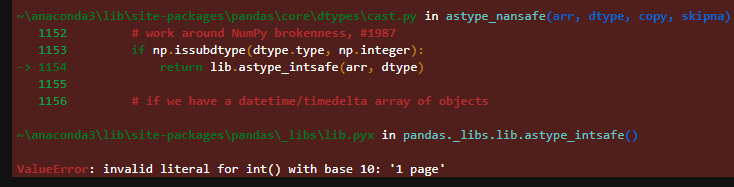

Hemos decidido dejar este error porque siendo obvio que las páginas son un entero, vemos que uno de los valores que intentamos parsear a enteros es '1 pages'; ¡¡bienvenidos al magnífico mundo de la ciencia del dato!!!

In [11]:
X.pages = X[['pages']].apply(pd.to_numeric, errors='coerce')

In [12]:
X[['bbeScore', 'numRatings','bbeVotes']] = X[['bbeScore', 'numRatings','bbeVotes']].fillna(-5).astype(np.int64)

In [13]:
X.replace(-5,np.NaN).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   language          48672 non-null  object 
 1   genres            52478 non-null  object 
 2   characters        52478 non-null  object 
 3   bookFormat        51005 non-null  object 
 4   pages             50108 non-null  float64
 5   publishDate       51598 non-null  object 
 6   firstPublishDate  31152 non-null  object 
 7   awards            52478 non-null  object 
 8   numRatings        52478 non-null  int64  
 9   ratingsByStars    52478 non-null  object 
 10  likedPercent      51856 non-null  object 
 11  setting           52478 non-null  object 
 12  bbeScore          52478 non-null  int64  
 13  bbeVotes          52478 non-null  int64  
 14  price             38113 non-null  object 
dtypes: float64(1), int64(3), object(11)
memory usage: 6.0+ MB


Pages queda al final como float porque han tenido que ser eliminados ciertos datos de tipo cadena.

Para terminar con esta parte transformaremos los que son float64 y veremos los estadísticos más útiles:

In [14]:
#X[['likedPercent', 'price']] = X[['likedPercent', 'price']].astype(np.float64)

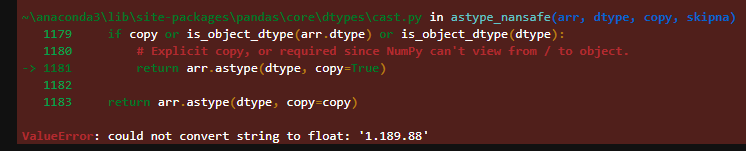

Otro error de un cariz parecido al anterior, vemos que en los números de más de tres cifras con decimales se usó el punto en los dos.

In [15]:
res = []
for elem in X.price:
    partes = str(elem).split('.')
    if len(partes) > 2:
        aux = [partes[0],partes[1],".",partes[2]]
        res.append(''.join(aux))
    elif len(partes) == 2:
        aux = [partes[0],".",partes[1]]
        res.append(''.join(aux))
    else:
        if partes[0] != 'nan':
            res.append(partes[0])
        else:
            res.append(np.nan)
            
X = X.drop('price', axis = 1)

X['price'] = res
X.price

0        5.09
1        7.38
2         NaN
3         NaN
4         2.1
         ... 
52473     NaN
52474     NaN
52475    7.37
52476    2.86
52477    5.20
Name: price, Length: 52478, dtype: object

In [16]:
X[['likedPercent', 'price']] = X[['likedPercent', 'price']].astype(np.float64)

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   language          48672 non-null  object 
 1   genres            52478 non-null  object 
 2   characters        52478 non-null  object 
 3   bookFormat        51005 non-null  object 
 4   pages             50108 non-null  float64
 5   publishDate       51598 non-null  object 
 6   firstPublishDate  31152 non-null  object 
 7   awards            52478 non-null  object 
 8   numRatings        52478 non-null  int64  
 9   ratingsByStars    52478 non-null  object 
 10  likedPercent      51856 non-null  float64
 11  setting           52478 non-null  object 
 12  bbeScore          52478 non-null  int64  
 13  bbeVotes          52478 non-null  int64  
 14  price             38113 non-null  float64
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [18]:
X.describe()

,pages,numRatings,likedPercent,bbeScore,bbeVotes,price
count,50108.000000,5.247800e+04,51856.000000,5.247800e+04,52478.000000,38113.000000
mean,328.664864,1.787865e+04,92.231545,1.984023e+03,22.529003,10.414949
std,252.178359,1.039448e+05,5.990689,3.515314e+04,369.158541,60.213706
min,0.000000,0.000000e+00,0.000000,0.000000e+00,-4.000000,0.840000
25%,210.000000,3.410000e+02,90.000000,8.400000e+01,1.000000,3.240000
50%,304.000000,2.307000e+03,94.000000,9.700000e+01,1.000000,5.210000
75%,392.000000,9.380500e+03,96.000000,1.870000e+02,2.000000,8.860000
max,14777.000000,7.048471e+06,100.000000,2.993816e+06,30516.000000,8715.510000


Libros con 0 páginas o votos negativos nos dan pistas de que eso son valores espurios, pero será mejor resolverlo en posteriores apartados. Aunque marcaremos los libros sin páginas como valores faltantes:

In [19]:
X[X.pages < 1] = np.nan

In [20]:
X.describe()

,pages,numRatings,likedPercent,bbeScore,bbeVotes,price
count,49944.000000,5.231400e+04,51698.000000,5.231400e+04,52314.000000,38042.000000
mean,329.744093,1.792728e+04,92.232156,1.989860e+03,22.594602,10.372188
std,251.886630,1.041035e+05,5.988560,3.520805e+04,369.734813,60.114667
min,2.000000,0.000000e+00,0.000000,0.000000e+00,-4.000000,0.840000
25%,212.000000,3.430000e+02,90.000000,8.400000e+01,1.000000,3.240000
50%,304.000000,2.323500e+03,94.000000,9.700000e+01,1.000000,5.200000
75%,392.000000,9.408750e+03,96.000000,1.870000e+02,2.000000,8.850000
max,14777.000000,7.048471e+06,100.000000,2.993816e+06,30516.000000,8715.510000


In [21]:
y = y.astype(np.float64)
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 52478 entries, 0 to 52477
Series name: rating
Non-Null Count  Dtype  
--------------  -----  
52478 non-null  float64
dtypes: float64(1)
memory usage: 410.1 KB


In [22]:
y.describe()

count    52478.000000
mean         4.021878
std          0.367146
min          0.000000
25%          3.820000
50%          4.030000
75%          4.230000
max          5.000000
Name: rating, dtype: float64

#### 1.2.3. Tratamiento de variables categóricas

En este apartado trataremos las dos variables categóricas "language" y "bookFormat".

Primero nos definimos unas funciones auxiliares para facilitar el proceso.

In [23]:
def mas_populares(lista, n):
    unique_values = pd.unique(lista)
    value_counts = pd.value_counts(lista)
    unique_values_sorted = value_counts.sort_values(ascending=False).index
    return unique_values_sorted[0:n]

def mas_populares_df(X, col_name, n):
    return mas_populares(X[col_name], n)

In [24]:
print(mas_populares_df(X, 'language', 20))
print(mas_populares_df(X, 'bookFormat', 10))

Index(['English', 'Arabic', 'Spanish', 'French', 'German', 'Indonesian',
       'Portuguese', 'Italian', 'Dutch', 'Turkish', 'Persian', 'Polish',
       'Greek, Modern (1453-)', 'Russian', 'Japanese', 'Swedish', 'Romanian',
       'Bengali', 'Malay', 'Bulgarian'],
      dtype='object')
Index(['Paperback', 'Hardcover', 'Kindle Edition', 'Mass Market Paperback',
       'ebook', 'Audio CD', 'Nook', 'Unknown Binding', 'Audiobook',
       'Trade Paperback'],
      dtype='object')


Vemos que entre los idimos más populares está el griego moderno, pero para que no figure en ese fromato lo transformaremos más adelante.
<br><br>
Entre los formato de libros, vemos que muchos son muy parecidos de una misma categoría; por ello, los agruparemos para no tener muchas columnas.

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   language          48554 non-null  object 
 1   genres            52314 non-null  object 
 2   characters        52314 non-null  object 
 3   bookFormat        50841 non-null  object 
 4   pages             49944 non-null  float64
 5   publishDate       51435 non-null  object 
 6   firstPublishDate  31037 non-null  object 
 7   awards            52314 non-null  object 
 8   numRatings        52314 non-null  float64
 9   ratingsByStars    52314 non-null  object 
 10  likedPercent      51698 non-null  float64
 11  setting           52314 non-null  object 
 12  bbeScore          52314 non-null  float64
 13  bbeVotes          52314 non-null  float64
 14  price             38042 non-null  float64
dtypes: float64(6), object(9)
memory usage: 6.0+ MB


In [26]:
X['language'] = X['language'].where(X['language'].isin(mas_populares_df(X, 'language', 20)), np.nan)
X['bookFormat'] = X['bookFormat'].where(X['bookFormat'].isin(mas_populares_df(X, 'bookFormat', 5)), np.nan)

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   language          47811 non-null  object 
 1   genres            52314 non-null  object 
 2   characters        52314 non-null  object 
 3   bookFormat        49896 non-null  object 
 4   pages             49944 non-null  float64
 5   publishDate       51435 non-null  object 
 6   firstPublishDate  31037 non-null  object 
 7   awards            52314 non-null  object 
 8   numRatings        52314 non-null  float64
 9   ratingsByStars    52314 non-null  object 
 10  likedPercent      51698 non-null  float64
 11  setting           52314 non-null  object 
 12  bbeScore          52314 non-null  float64
 13  bbeVotes          52314 non-null  float64
 14  price             38042 non-null  float64
dtypes: float64(6), object(9)
memory usage: 6.0+ MB


In [28]:
X['language'] = X['language'].replace('Greek, Modern (1453-)', 'Greek')

In [29]:
X['bookFormat'] = X['bookFormat'].replace('Kindle Edition', 'Digital')
X['bookFormat'] = X['bookFormat'].replace('ebook', 'Digital')
X['bookFormat'] = X['bookFormat'].replace('Nook', 'Digital')

X['bookFormat'] = X['bookFormat'].replace('Mass Market Paperback', 'Paperback')
X['bookFormat'] = X['bookFormat'].replace('Trade Paperback', 'Paperback')

X['bookFormat'] = X['bookFormat'].replace('Audio CD', 'Audio')
X['bookFormat'] = X['bookFormat'].replace('Audiobook', 'Audio')

X['bookFormat'] = X['bookFormat'].replace('Unknown Binding', np.nan)

In [30]:
X.bookFormat.unique()

array(['Hardcover', 'Paperback', 'Digital', nan], dtype=object)

Vemos que ya hemos terminado con este apartado, pasemos a las fechas.

#### 1.2.4. Tratamiento de fechas


In [31]:
X[['publishDate', 'firstPublishDate']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   publishDate       51435 non-null  object
 1   firstPublishDate  31037 non-null  object
dtypes: object(2)
memory usage: 820.1+ KB


In [32]:
X = X.drop(['firstPublishDate'], axis=1)

In [33]:
X['publishDate']

0                  09/14/08
1                  09/28/04
2                  05/23/06
3                  10/10/00
4                  09/06/06
                ...        
52473                   NaN
52474       August 5th 2011
52475       March 18th 2011
52476    September 1st 2011
52477          May 8th 2011
Name: publishDate, Length: 52478, dtype: object

In [34]:
X['publishDate'] = pd.to_datetime(X['publishDate'], errors='coerce')
X['publishDate']

0       2008-09-14
1       2004-09-28
2       2006-05-23
3       2000-10-10
4       2006-09-06
           ...    
52473          NaT
52474   2011-08-05
52475   2011-03-18
52476   2011-09-01
52477   2011-05-08
Name: publishDate, Length: 52478, dtype: datetime64[ns]

In [35]:
X['publishYear'] = X['publishDate'].dt.year
X['publishMonth'] = X['publishDate'].dt.month
X['publishDay'] = X['publishDate'].dt.day

X = X.drop(['publishDate'], axis=1)

X.head(1)

,language,genres,characters,bookFormat,pages,awards,numRatings,ratingsByStars,likedPercent,setting,bbeScore,bbeVotes,price,publishYear,publishMonth,publishDay
0,English,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,374.0,['Locus Award Nominee for Best Young Adult Boo...,6376780.0,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",2993816.0,30516.0,5.09,2008.0,9.0,14.0


#### 1.2.5. Tratamiento de variables con formato lista

Vamos a crear un método que transforme las variables con una cadena semejante a una lista en éstas.

In [36]:
import ast

def trans_list(nom_col, X):
    res = []
    for elem in X[nom_col]:
        if pd.isna(elem):
                res.append(np.nan)
        else:
            res.append(ast.literal_eval(elem))
    return res

Primero, vamos a decidir qué variables queremos preprocesar y cuales eliminar porque la información que nos pueden aportar no sea suficiente. Eliminemos estas variables.

In [37]:
X = X.drop(['characters', 'setting'], axis=1)
X.head()

,language,genres,bookFormat,pages,awards,numRatings,ratingsByStars,likedPercent,bbeScore,bbeVotes,price,publishYear,publishMonth,publishDay
0,English,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",Hardcover,374.0,['Locus Award Nominee for Best Young Adult Boo...,6376780.0,"['3444695', '1921313', '745221', '171994', '93...",96.0,2993816.0,30516.0,5.09,2008.0,9.0,14.0
1,English,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",Paperback,870.0,['Bram Stoker Award for Works for Young Reader...,2507623.0,"['1593642', '637516', '222366', '39573', '14526']",98.0,2632233.0,26923.0,7.38,2004.0,9.0,28.0
2,English,"['Classics', 'Fiction', 'Historical Fiction', ...",Paperback,324.0,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075.0,"['2363896', '1333153', '573280', '149952', '80...",95.0,2269402.0,23328.0,NaN,2006.0,5.0,23.0
3,English,"['Classics', 'Fiction', 'Romance', 'Historical...",Paperback,279.0,[],2998241.0,"['1617567', '816659', '373311', '113934', '767...",94.0,1983116.0,20452.0,NaN,2000.0,10.0,10.0
4,English,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...",Paperback,501.0,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519.0,"['1751460', '1113682', '1008686', '542017', '5...",78.0,1459448.0,14874.0,2.10,2006.0,9.0,6.0


Y ahora transformemos las que sí que deseamos transformar a listas.

In [38]:
res = trans_list('genres', X)
X = X.drop('genres', axis = 1)
X['genres'] = res

res = trans_list('ratingsByStars', X)
X = X.drop('ratingsByStars', axis = 1)
X['ratingsByStars'] = res

res = trans_list('awards', X)
X = X.drop('awards', axis = 1)
X['awards'] = res

In [39]:
X.genres[0][0]

'Young Adult'

Ahora, teniendo ya las listas en su formato correspondiente, vamos a tratar cada una de ellas:
   - 'ratingsByStars': Tendría sentido separar cada uno de los cinco elementos en cinco columnas distintas; una para las cinco estrellas, otra para las cuatro y así hasta las valoraciones de una estrella.
   - 'awards': vamos a contar el número de premios que tiene, si que estaríamos sesgando ligeramente el resultado porque no valen lo mismo unos premios que otros; pero no teniendo un conocimiento sobre éstos es la mejor solución.
   - 'genre': con esta lista, lo mejor sería contar los 20 géneros más populares y dedicar en un oneHot encoding una columna a cada género, aquellos que no tengan género o sus generos no estén en esa lista tendrán todo ceros.

ratingsByStars:

In [40]:
X["ratingsByStars"].isna().sum()

164

Transformamos los nulos a listas con 0s para que no nos den problemas, esto lo haremos con las tres listas.

In [41]:
X["ratingsByStars"] = X["ratingsByStars"].apply(lambda x: [0, 0, 0, 0, 0] if pd.isna(np.array(x)).any() or not x else x)

In [42]:
X["ratingsByStars"].isna().sum()

0

In [43]:
res = pd.DataFrame(X["ratingsByStars"].to_list(), columns=['5Stars', '4Stars', '3Stars', '2Stars', '1Star'], index = X.index)
X = X.drop('ratingsByStars', axis = 1)
X = pd.concat([X, res], axis = 1)
X.head()

,language,bookFormat,pages,numRatings,likedPercent,bbeScore,bbeVotes,price,publishYear,publishMonth,publishDay,genres,awards,5Stars,4Stars,3Stars,2Stars,1Star
0,English,Hardcover,374.0,6376780.0,96.0,2993816.0,30516.0,5.09,2008.0,9.0,14.0,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...",[Locus Award Nominee for Best Young Adult Book...,3444695,1921313,745221,171994,93557
1,English,Paperback,870.0,2507623.0,98.0,2632233.0,26923.0,7.38,2004.0,9.0,28.0,"[Fantasy, Young Adult, Fiction, Magic, Childre...",[Bram Stoker Award for Works for Young Readers...,1593642,637516,222366,39573,14526
2,English,Paperback,324.0,4501075.0,95.0,2269402.0,23328.0,NaN,2006.0,5.0,23.0,"[Classics, Fiction, Historical Fiction, School...","[Pulitzer Prize for Fiction (1961), Audie Awar...",2363896,1333153,573280,149952,80794
3,English,Paperback,279.0,2998241.0,94.0,1983116.0,20452.0,NaN,2000.0,10.0,10.0,"[Classics, Fiction, Romance, Historical Fictio...",[],1617567,816659,373311,113934,76770
4,English,Paperback,501.0,4964519.0,78.0,1459448.0,14874.0,2.10,2006.0,9.0,6.0,"[Young Adult, Fantasy, Romance, Vampires, Fict...","[Georgia Peach Book Award (2007), Buxtehuder B...",1751460,1113682,1008686,542017,548674


In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   language      47811 non-null  object 
 1   bookFormat    49896 non-null  object 
 2   pages         49944 non-null  float64
 3   numRatings    52314 non-null  float64
 4   likedPercent  51698 non-null  float64
 5   bbeScore      52314 non-null  float64
 6   bbeVotes      52314 non-null  float64
 7   price         38042 non-null  float64
 8   publishYear   50532 non-null  float64
 9   publishMonth  50532 non-null  float64
 10  publishDay    50532 non-null  float64
 11  genres        52314 non-null  object 
 12  awards        52314 non-null  object 
 13  5Stars        52478 non-null  object 
 14  4Stars        52478 non-null  object 
 15  3Stars        52478 non-null  object 
 16  2Stars        52478 non-null  object 
 17  1Star         52478 non-null  object 
dtypes: float64(9), object(9)
m

awards:

Procedemos con la columna "awards", en este vamos a contar cuantos premios tiene y reemplazar ese valor por la lista.

In [45]:
X["awards"] = X["awards"].apply(lambda x: [] if pd.isna(np.array(x)).any() else x)

In [46]:
res = [len(x) for x in X.awards]
X["awards"] = res

In [47]:
X.awards

0        41
1         9
2         4
3         0
4        25
         ..
52473     0
52474     0
52475     1
52476     0
52477     0
Name: awards, Length: 52478, dtype: int64

genre:

Para el género calculamos las 20 categorias más populares:

In [48]:
def mas_populares_lista(X, col_name, n):
    lista_global = [subelemento for elemento in X["genres"].to_list() if not pd.isna(np.array(elemento)).any() for subelemento in elemento]
    return mas_populares(lista_global, n)

In [49]:
%%time
mas_populares_lista(X, 'genres', 20)

Wall time: 602 ms


Index(['Fiction', 'Romance', 'Fantasy', 'Young Adult', 'Contemporary', 'Adult',
       'Nonfiction', 'Novels', 'Mystery', 'Historical Fiction', 'Audiobook',
       'Classics', 'Adventure', 'Historical', 'Paranormal', 'Literature',
       'Science Fiction', 'Childrens', 'Thriller', 'Magic'],
      dtype='object')

Casi lo tenemos, pero como entre todas ellas hay una que es "Audiobook" vamos a buscar 21 y cambiarla por esa.

In [50]:
gen_pop = mas_populares_lista(X, 'genres', 21).delete(10)

In [51]:
X["genres"] = X["genres"].apply(lambda x: [] if pd.isna(np.array(x)).any() else x)

In [52]:
X["genres"] = X['genres'].apply(lambda x: [elem for elem in x if elem in gen_pop])

In [53]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   language      47811 non-null  object 
 1   bookFormat    49896 non-null  object 
 2   pages         49944 non-null  float64
 3   numRatings    52314 non-null  float64
 4   likedPercent  51698 non-null  float64
 5   bbeScore      52314 non-null  float64
 6   bbeVotes      52314 non-null  float64
 7   price         38042 non-null  float64
 8   publishYear   50532 non-null  float64
 9   publishMonth  50532 non-null  float64
 10  publishDay    50532 non-null  float64
 11  genres        52478 non-null  object 
 12  awards        52478 non-null  int64  
 13  5Stars        52478 non-null  object 
 14  4Stars        52478 non-null  object 
 15  3Stars        52478 non-null  object 
 16  2Stars        52478 non-null  object 
 17  1Star         52478 non-null  object 
dtypes: float64(9), int64(1), o

Ya solo nos falta cambiar el formato de las columnas de las estrellas a "int64".

In [54]:
X[['5Stars', '4Stars', '3Stars', '2Stars', '1Star']] = X[['5Stars', '4Stars', '3Stars', '2Stars', '1Star']].astype(np.int64)

In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   language      47811 non-null  object 
 1   bookFormat    49896 non-null  object 
 2   pages         49944 non-null  float64
 3   numRatings    52314 non-null  float64
 4   likedPercent  51698 non-null  float64
 5   bbeScore      52314 non-null  float64
 6   bbeVotes      52314 non-null  float64
 7   price         38042 non-null  float64
 8   publishYear   50532 non-null  float64
 9   publishMonth  50532 non-null  float64
 10  publishDay    50532 non-null  float64
 11  genres        52478 non-null  object 
 12  awards        52478 non-null  int64  
 13  5Stars        52478 non-null  int64  
 14  4Stars        52478 non-null  int64  
 15  3Stars        52478 non-null  int64  
 16  2Stars        52478 non-null  int64  
 17  1Star         52478 non-null  int64  
dtypes: float64(9), int64(6), o

Y con esto habríamos acabado todo el apartado de preprocesado, que vemos que no es poco. Pero antes, para poder realizar los apartados posteriores, vamos a hacer un OneHot encoding sobre los géneros, para tener 20 columnas para cada género y no una lista.

In [56]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

res = pd.DataFrame(mlb.fit_transform(X.genres),
                   columns=mlb.classes_,
                   index=X.index)
res.head()

,Adult,Adventure,Childrens,Classics,Contemporary,Fantasy,Fiction,Historical,Historical Fiction,Humor,Literature,Magic,Mystery,Nonfiction,Novels,Paranormal,Romance,Science Fiction,Thriller,Young Adult
0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1
1,0,1,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,1
3,1,0,0,1,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1


In [57]:
X = X.drop('genres', axis = 1)
X = pd.concat([X, res], axis = 1)
X.head()

,language,bookFormat,pages,numRatings,likedPercent,bbeScore,bbeVotes,price,publishYear,publishMonth,...,Literature,Magic,Mystery,Nonfiction,Novels,Paranormal,Romance,Science Fiction,Thriller,Young Adult
0,English,Hardcover,374.0,6376780.0,96.0,2993816.0,30516.0,5.09,2008.0,9.0,...,0,0,0,0,0,0,1,1,0,1
1,English,Paperback,870.0,2507623.0,98.0,2632233.0,26923.0,7.38,2004.0,9.0,...,0,1,0,0,0,0,0,0,0,1
2,English,Paperback,324.0,4501075.0,95.0,2269402.0,23328.0,NaN,2006.0,5.0,...,1,0,0,0,1,0,0,0,0,1
3,English,Paperback,279.0,2998241.0,94.0,1983116.0,20452.0,NaN,2000.0,10.0,...,1,0,0,0,1,0,1,0,0,0
4,English,Paperback,501.0,4964519.0,78.0,1459448.0,14874.0,2.10,2006.0,9.0,...,0,0,0,0,0,1,1,0,0,1


#### 1.2.6. Eliminación de registros inconsistentes

In [58]:
df = pd.concat([X, y], axis=1)

Antes hemos notado que ciertos valores podrían ser espurios. Concretamente, aquellos de la columna `'bbeVotes'` que tienen valores menores que 0.

In [59]:
df.describe().loc['min','bbeVotes']

-4.0

Además, también nos podemos fijar en que no todos los valores de la variable `'rating'` están entre 1 y 5 (posibles evaluaciones al tratar medias de puntuaciones en el intervalo [1,5]).

In [60]:
print('Mínimo:', df['rating'].min())
print('Máximo:', df['rating'].max())

Mínimo: 0.0
Máximo: 5.0


Hay valores que bajan hasta 0.0. Esto se debe a que la página registra con este valor aquellos registros que no tienen votaciones.

In [61]:
df.columns

Index(['language', 'bookFormat', 'pages', 'numRatings', 'likedPercent',
       'bbeScore', 'bbeVotes', 'price', 'publishYear', 'publishMonth',
       'publishDay', 'awards', '5Stars', '4Stars', '3Stars', '2Stars', '1Star',
       'Adult', 'Adventure', 'Childrens', 'Classics', 'Contemporary',
       'Fantasy', 'Fiction', 'Historical', 'Historical Fiction', 'Humor',
       'Literature', 'Magic', 'Mystery', 'Nonfiction', 'Novels', 'Paranormal',
       'Romance', 'Science Fiction', 'Thriller', 'Young Adult', 'rating'],
      dtype='object')

In [62]:
df[df['rating'] == 0][['numRatings', 'likedPercent']].head()

,numRatings,likedPercent
8321,0.0,NaN
17834,0.0,NaN
17907,0.0,NaN
18197,0.0,NaN
18618,0.0,NaN


Eliminamos estos registros.

In [63]:
print(df.shape)
df = df[(df['rating'] != 0) & (df['bbeVotes'] >= 0)]
print(df.shape)

(52478, 38)
(52191, 38)


In [64]:
# Separamos explicativas de explicada

X, y = df.drop('rating', axis=1), df.rating
print(X.shape, y.shape)

(52191, 37) (52191,)


Finalmente, vamos a exportar el dataset, para poder trabajar a partir de aquí de una mejor manera. Por cuestiones de claridad vamos a cambiar el nombre de la variable objetivo por `'target'`.

In [65]:
X['target'] = y.values
X.to_csv('libros_preprocesado.csv')

In [66]:
X, y = X.drop('target', axis=1), X.target
print(X.shape, y.shape)

(52191, 37) (52191,)


## 2. Preprocesamiento de los datos

Primero, vamos a cargar los datos limpios, para no tener que ejecutar todo lo anterior.

In [67]:
import pandas as pd
import numpy as np

df = pd.read_csv('libros_preprocesado.csv', header=0, index_col=0)
print(df.shape)

(52191, 38)


Para limpiar los datos, vamos a eliminar las columnas que contengan un único valor y a estudiar aquellas que tengan un bajo número de valores diferentes o una baja varianza. También vamos a eliminar las filas repetidas.También analizaremos tanto los valores nulos, realizando el borrado o las imputaciones correspondientes, como los outliers, aplicando las técnicas estudiadas en clase.
<br><br>
Después, se aplicarán técnicas en esos datos que implicarán codificar, escalar y transformar su distribución, para terminar aplicando "features engineering".

### 2.1. Limpieza básica de datos

#### 2.1.1. Valores únicos

Primero, para identificar los valores únicos, vamos a comprobar para cada columna cuantos tiene:

In [68]:
df.nunique()

language                 20
bookFormat                3
pages                  1362
numRatings            19326
likedPercent             66
bbeScore               3540
bbeVotes                645
price                  3645
publishYear             126
publishMonth             12
publishDay               31
awards                   27
5Stars                12883
4Stars                12470
3Stars                 9680
2Stars                 5001
1Star                  3226
Adult                     2
Adventure                 2
Childrens                 2
Classics                  2
Contemporary              2
Fantasy                   2
Fiction                   2
Historical                2
Historical Fiction        2
Humor                     2
Literature                2
Magic                     2
Mystery                   2
Nonfiction                2
Novels                    2
Paranormal                2
Romance                   2
Science Fiction           2
Thriller            

Tenemos las columnas a las que les hemos aplicado el OneHot encoding que tienen únicamente 2 valores, pero eso es normal; a parte de estas variables, ninguna numérica tienen pocos valores como para ser eliminada.

#### 2.1.2. Baja variedad de valores

Para llevar a cabo la identificación de las variables que tienen una baja variedad de valores, mostremos para cada una el número de valores únicos que toma y el porcentaje que supone respecto al total de registros.

In [69]:
for i in range(df.shape[1]):
    name = ''
    num = len(df.iloc[:, i].unique())
    name = df.columns[i]
    percentage = num / df.shape[0] * 100
    print('%d \t %d \t %.1f%% \t %s' % (i, num, percentage, name))

0 	 21 	 0.0% 	 language
1 	 4 	 0.0% 	 bookFormat
2 	 1363 	 2.6% 	 pages
3 	 19326 	 37.0% 	 numRatings
4 	 67 	 0.1% 	 likedPercent
5 	 3540 	 6.8% 	 bbeScore
6 	 645 	 1.2% 	 bbeVotes
7 	 3646 	 7.0% 	 price
8 	 127 	 0.2% 	 publishYear
9 	 13 	 0.0% 	 publishMonth
10 	 32 	 0.1% 	 publishDay
11 	 27 	 0.1% 	 awards
12 	 12883 	 24.7% 	 5Stars
13 	 12470 	 23.9% 	 4Stars
14 	 9680 	 18.5% 	 3Stars
15 	 5001 	 9.6% 	 2Stars
16 	 3226 	 6.2% 	 1Star
17 	 2 	 0.0% 	 Adult
18 	 2 	 0.0% 	 Adventure
19 	 2 	 0.0% 	 Childrens
20 	 2 	 0.0% 	 Classics
21 	 2 	 0.0% 	 Contemporary
22 	 2 	 0.0% 	 Fantasy
23 	 2 	 0.0% 	 Fiction
24 	 2 	 0.0% 	 Historical
25 	 2 	 0.0% 	 Historical Fiction
26 	 2 	 0.0% 	 Humor
27 	 2 	 0.0% 	 Literature
28 	 2 	 0.0% 	 Magic
29 	 2 	 0.0% 	 Mystery
30 	 2 	 0.0% 	 Nonfiction
31 	 2 	 0.0% 	 Novels
32 	 2 	 0.0% 	 Paranormal
33 	 2 	 0.0% 	 Romance
34 	 2 	 0.0% 	 Science Fiction
35 	 2 	 0.0% 	 Thriller
36 	 2 	 0.0% 	 Young Adult
37 	 260 	 0.5% 	 target


Vemos que en hay variables que tienen pocos valores distintos, pero esto es porque son varaibles categóricas limitadas a un rango concreto. No parece necesario eliminar estas variables.

#### 2.1.3. Valores de baja varianza

Ahora vamos a comprobar qué variables tienen una varianza muy muy pequeña, lo cual implicaría que estuvieran muy cerca de tener un solo valor, y de ser necesario eliminarlas también.

Primero, separamos las variables explicativas de la explicada:

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52191 entries, 0 to 52477
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   language            47716 non-null  object 
 1   bookFormat          49783 non-null  object 
 2   pages               49848 non-null  float64
 3   numRatings          52191 non-null  float64
 4   likedPercent        51646 non-null  float64
 5   bbeScore            52191 non-null  float64
 6   bbeVotes            52191 non-null  float64
 7   price               37977 non-null  float64
 8   publishYear         50424 non-null  float64
 9   publishMonth        50424 non-null  float64
 10  publishDay          50424 non-null  float64
 11  awards              52191 non-null  int64  
 12  5Stars              52191 non-null  int64  
 13  4Stars              52191 non-null  int64  
 14  3Stars              52191 non-null  int64  
 15  2Stars              52191 non-null  int64  
 16  1Sta

In [71]:
from sklearn.feature_selection import VarianceThreshold

#También necesitamos, para este método quedarnos solo con las variables numéricas
col_num = df.iloc[:,2:-1]

thresholds = np.arange(0.0, 0.31, 0.01)

results = list()
for t in thresholds:
    
    transform = VarianceThreshold(threshold=t)
    
    col_num_trans = transform.fit_transform(col_num)
    
    n_features = col_num_trans.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    
    results.append(n_features)

>Threshold=0.00, Features=35
>Threshold=0.01, Features=35
>Threshold=0.02, Features=35
>Threshold=0.03, Features=35
>Threshold=0.04, Features=35
>Threshold=0.05, Features=35
>Threshold=0.06, Features=35
>Threshold=0.07, Features=35
>Threshold=0.08, Features=32
>Threshold=0.09, Features=31
>Threshold=0.10, Features=29
>Threshold=0.11, Features=26
>Threshold=0.12, Features=25
>Threshold=0.13, Features=22
>Threshold=0.14, Features=20
>Threshold=0.15, Features=20
>Threshold=0.16, Features=20
>Threshold=0.17, Features=19
>Threshold=0.18, Features=18
>Threshold=0.19, Features=18
>Threshold=0.20, Features=18
>Threshold=0.21, Features=16
>Threshold=0.22, Features=16
>Threshold=0.23, Features=16
>Threshold=0.24, Features=15
>Threshold=0.25, Features=15
>Threshold=0.26, Features=15
>Threshold=0.27, Features=15
>Threshold=0.28, Features=15
>Threshold=0.29, Features=15
>Threshold=0.30, Features=15


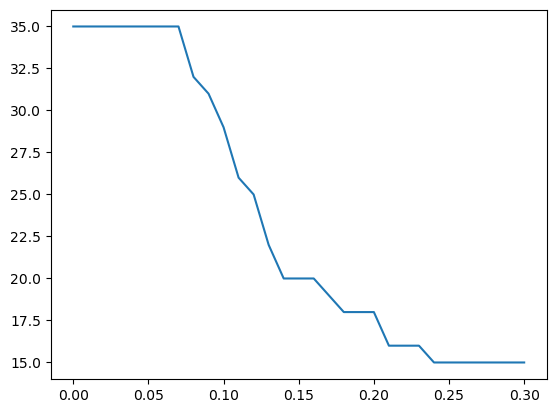

In [72]:
import matplotlib.pyplot as plt

plt.plot(thresholds, results)
plt.show()

Vemos que puede ser interesante eliminar las variables hasta el 0.15, por ello vamos generar dos datasets: uno con todas las variables y otro con las eliminadas.

In [73]:
from sklearn.feature_selection import VarianceThreshold

transform = VarianceThreshold(threshold=0.15)

df_noLowVar = transform.fit_transform(col_num)
df_noLowVar.shape

(52191, 20)

In [74]:
df_noLowVar = pd.concat([pd.DataFrame(df_noLowVar, index=df.index),  df.iloc[:,:2], df.target], axis=1)

Vamos almacenando nuestros datasets en la siguiente lista.

In [75]:
datasets = {"Original": df, "Sin baja varianza": df_noLowVar}

#### 2.1.4. Valores duplicados

Veamos el número de registros duplicados (contando la variable target) que existen en nuestros datasets.

In [76]:
# Normal
dups = datasets["Original"].duplicated()
print(dups.any())
print(datasets["Original"][dups].shape[0])
# Sin variables con baja varianza
dups = datasets["Sin baja varianza"].duplicated()
print(dups.any())
print(datasets["Sin baja varianza"][dups].shape[0])

True
52
True
52


Vemos que tenemos 52 filas duplicadas, procedemos a eliminarlas.

In [77]:
print("Con duplicados: ", datasets["Original"].shape)
datasets["Original"].drop_duplicates(inplace=True)
print("Sin duplicados: ", datasets["Original"].shape)

Con duplicados:  (52191, 38)
Sin duplicados:  (52139, 38)


Lo hacemos para el otro dataset:

In [78]:
print("Con duplicados: ", datasets["Sin baja varianza"].shape)
datasets["Sin baja varianza"].drop_duplicates(inplace=True)
print("Sin duplicados: ", datasets["Sin baja varianza"].shape)

Con duplicados:  (52191, 23)
Sin duplicados:  (52139, 23)


Ya tenemos nuestros datos limpios de duplicados.

### 2.2. Valores perdidos

En este apartado vamos a encargarnos de los valores espurios, lo hacemos aquí y no después porque tener valores perdidos a la hora de realizar posteriores apartados nos generará problemas.

#### 2.2.1. Identificación de valores perdidos

In [78]:
num_nulls = (df.isnull()).sum()

print(num_nulls)

language               4468
bookFormat             2405
pages                  2337
numRatings                0
likedPercent            544
bbeScore                  0
bbeVotes                  0
price                 14191
publishYear            1764
publishMonth           1764
publishDay             1764
awards                    0
5Stars                    0
4Stars                    0
3Stars                    0
2Stars                    0
1Star                     0
Adult                     0
Adventure                 0
Childrens                 0
Classics                  0
Contemporary              0
Fantasy                   0
Fiction                   0
Historical                0
Historical Fiction        0
Humor                     0
Literature                0
Magic                     0
Mystery                   0
Nonfiction                0
Novels                    0
Paranormal                0
Romance                   0
Science Fiction           0
Thriller            

In [79]:
nulos = pd.DataFrame(columns=['Column', 'Missing', 'Missing(%)'])

for i in range(df.shape[1]):
    n_miss = df.iloc[:,i].isnull().sum()
    perc = n_miss / df.shape[0] * 100
    nulos.loc[i] = [df.columns[i], n_miss, perc]

nulos[nulos['Missing(%)'] > 0.].sort_values('Missing', ascending=False)

,Column,Missing,Missing(%)
7,price,14191,27.217630
0,language,4468,8.569401
1,bookFormat,2405,4.612670
2,pages,2337,4.482249
8,publishYear,1764,3.383264
9,publishMonth,1764,3.383264
10,publishDay,1764,3.383264
4,likedPercent,544,1.043365


Vemos que tenemos en muchas columnas un grave problema de valores nulos, así que como viene así estructurado en la asignatura en este apartado simplemente vamos a eliminarlos. Más adelante los imputaremos.

#### 2.2.2. Borrado de filas con valores nulos

In [80]:
ds_aux = datasets.copy()
for key, value in ds_aux.items():
    print(key)
    aux = value.copy()
    aux.dropna(inplace=True)
    #Antes
    print(value.shape)
    #Después
    print(aux.shape)
    datasets[f"{key}_NoNulls"] = aux

Original
(52139, 38)
(34401, 38)
Sin baja varianza
(52139, 23)
(34401, 23)


Vemos que pasamos a tener unas 34.000 instancias.

In [81]:
 datasets["Original_NoNulls"]

,language,bookFormat,pages,numRatings,likedPercent,bbeScore,bbeVotes,price,publishYear,publishMonth,...,Magic,Mystery,Nonfiction,Novels,Paranormal,Romance,Science Fiction,Thriller,Young Adult,target
0,English,Hardcover,374.0,6376780.0,96.0,2993816.0,30516.0,5.09,2008.0,9.0,...,0,0,0,0,0,1,1,0,1,4.33
1,English,Paperback,870.0,2507623.0,98.0,2632233.0,26923.0,7.38,2004.0,9.0,...,1,0,0,0,0,0,0,0,1,4.50
4,English,Paperback,501.0,4964519.0,78.0,1459448.0,14874.0,2.10,2006.0,9.0,...,0,0,0,0,1,1,0,0,1,3.60
5,English,Hardcover,552.0,1834276.0,96.0,1372809.0,14168.0,3.80,2006.0,3.0,...,0,0,0,0,0,0,0,0,1,4.37
6,English,Paperback,141.0,2740713.0,91.0,1276599.0,13264.0,4.42,1996.0,4.0,...,0,0,0,1,0,0,1,0,0,3.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52470,English,Paperback,416.0,2143.0,95.0,0.0,1.0,5.55,2011.0,10.0,...,0,1,0,0,0,1,0,0,0,4.14
52472,English,Paperback,360.0,1028.0,94.0,0.0,1.0,19.18,2013.0,4.0,...,0,1,0,0,0,1,0,0,1,4.16
52475,English,Paperback,280.0,6674.0,84.0,0.0,1.0,7.37,2011.0,3.0,...,0,0,0,0,1,1,0,0,1,3.70
52476,English,Paperback,507.0,238.0,90.0,0.0,1.0,2.86,2011.0,9.0,...,0,1,0,0,0,0,0,0,0,3.85


#### 2.2.3. Imputación de valores perdidos

##### 2.2.3.1. Imputación estadística

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

pipelines = {}

In [83]:
# Creamos la pipeline para imputar las variables categóricas
cat_cols = ['language', 'bookFormat']
cat = SimpleImputer(strategy='most_frequent')
# Y la que imputará las variables numéricas:
num_cols = df[df.columns.difference(cat_cols+['target'])].columns.to_list()
strategies = ['mean', 'median', 'most_frequent', 'constant']
for s in strategies:
    pipelines[f'SimpleImputer_{s}'] = ColumnTransformer(
                                                        [
                                                         ('cat_imputer', cat, cat_cols),
                                                         ('num_imputer', SimpleImputer(strategy=s), num_cols)
                                                         ]
                                                        )

Vemos que tenemos en varias pipelines las estrategias de imputado, haremos esto con las posteriores estratégias y en un apartado de resultados las validaremos.

##### 2.2.3.2. Imputación por KNN

Hacemos lo mismo con al estrategia de imputación por KNN. Pero en este apartado, perimero haremos un Label Encoder de las variables categóricas para poder realizarlo sobre todo el dataset y luego su correspondiente inverse_transform. Es decir, codificamos con un label encoder, luego aplicamos KNN_imputer, y por último decodificamos. Para ello, hemos creado dos clases que se puedan meter en una pipeline.

In [84]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [80]:
class ColumnLabelEncoder:
    def __init__(self, le = None, column = None):
        self.le = le
        self.column = column # array of column names to encode

    def fit(self,X,y=None):
        return self# not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        output[self.column] = self.le.fit_transform(output[self.column])
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
    
    def inverse_transform(self, X):
        return self.le.inverse_transform(X)

In [81]:
class ColumnLabelDesencoder:
    def __init__(self,le = None, column = None):
        self.le = le # array of column names to encode
        self.column = column

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        output = np.array(X.copy(), dtype=object)
        output[:,self.column] = self.le.inverse_transform(X[:,self.column].astype(int))
        return output

    def fit_transform(self,X,y=None):
        return self.transform(X)

In [87]:
from sklearn.impute import KNNImputer

strategies = [i for i in range(5,16,2)]
le_lan = ColumnLabelEncoder(LabelEncoder(), 'language')
le_bf = ColumnLabelEncoder(LabelEncoder(), 'bookFormat')
for s in strategies:
    pipelines[f'Numerical_KNN{s}'] = Pipeline(steps=[('le_lan', le_lan), ('le_bf', le_bf),
                                                     ('i',KNNImputer(n_neighbors=s)), ('ld_lan', ColumnLabelDesencoder(le_lan, 0)),
                                                    ('ld_bf', ColumnLabelDesencoder(le_bf, 1))])

##### 2.2.3.3. Imputación iterativa

In [88]:
import warnings
warnings.filterwarnings('ignore')

In [89]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

strategies = ['ascending', 'descending', 'roman', 'arabic', 'random']
le_lan = ColumnLabelEncoder(LabelEncoder(), 'language')
le_bf = ColumnLabelEncoder(LabelEncoder(), 'bookFormat')
for s in strategies:
    pipelines[f'Numerical_Lasso_{s}'] = Pipeline(steps=[('le_lan', le_lan), ('le_bf', le_bf),
                                                        ('i', IterativeImputer(estimator=linear_model.Lasso(alpha=0.1), n_nearest_features=None,imputation_order=s)),
                                                       ('ld_lan', ColumnLabelDesencoder(le_lan, 0)),
                                                        ('ld_bf', ColumnLabelDesencoder(le_bf, 1))])
    pipelines[f'Numerical_LassoLars_{s}'] = Pipeline(steps=[('le_lan', le_lan), ('le_bf', le_bf),
                                                        ('i', IterativeImputer(estimator=linear_model.LassoLars(), n_nearest_features=None,imputation_order=s)),
                                                       ('ld_lan', ColumnLabelDesencoder(le_lan, 0)),
                                                        ('ld_bf', ColumnLabelDesencoder(le_bf, 1))])
    pipelines[f'Numerical_BayesianRidge_{s}'] = Pipeline(steps=[('le_lan', le_lan), ('le_bf', le_bf),
                                                        ('i', IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None,imputation_order=s)),
                                                       ('ld_lan', ColumnLabelDesencoder(le_lan, 0)),
                                                        ('ld_bf', ColumnLabelDesencoder(le_bf, 1))])

In [90]:
pipelines.keys()

dict_keys(['SimpleImputer_mean', 'SimpleImputer_median', 'SimpleImputer_most_frequent', 'SimpleImputer_constant', 'Numerical_KNN5', 'Numerical_KNN7', 'Numerical_KNN9', 'Numerical_KNN11', 'Numerical_KNN13', 'Numerical_KNN15', 'Numerical_Lasso_ascending', 'Numerical_LassoLars_ascending', 'Numerical_BayesianRidge_ascending', 'Numerical_Lasso_descending', 'Numerical_LassoLars_descending', 'Numerical_BayesianRidge_descending', 'Numerical_Lasso_roman', 'Numerical_LassoLars_roman', 'Numerical_BayesianRidge_roman', 'Numerical_Lasso_arabic', 'Numerical_LassoLars_arabic', 'Numerical_BayesianRidge_arabic', 'Numerical_Lasso_random', 'Numerical_LassoLars_random', 'Numerical_BayesianRidge_random'])

#### 2.2.4. Resultados

Ahora tenemos todas las pipelines, pero no podemos probarlas porque sería necesario codificar los datos para ello, así que vamos a hacerlo ahora. Por ello, no tenemos como tal un apartado para la codificación de variables.

Primero vamos a tener en una lista los tres modelos que vamos a usar

In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

modelos = {"RF": RandomForestRegressor(random_state=1), "RL": LinearRegression(), "SVR": SVR()}

Y ahora vemos el score de cada uno de los datasets con las distintas técnicas de imputado.

In [92]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

for model_name, model in modelos.items():
    for pip_name, pip in pipelines.items():
            
        df = datasets["Original"]
        
        X = df.loc[:500, df.columns != 'target']
        y = df.loc[:500, df.columns == 'target']
    
        # X = df_def.loc[:,df_def.columns != 'target']
        # y = df_def.loc[:,df_def.columns == 'target']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

        cat_cols = ['language', 'bookFormat']
            
        col_trans = ColumnTransformer([('num', pip.fit(X_train), X.columns),
                                                ('ohe_encoder', OneHotEncoder(), cat_cols)])
            
        X_train = col_trans.fit_transform(X_train)
        X_test = col_trans.transform(X_test)

        X_train = np.delete(X_train, [0,1], 1)
        X_test = np.delete(X_test, [0,1], 1)

        model.fit(X_train, y_train.values.ravel())
        y_hat = model.predict(X_test)

        score = mean_squared_error(y_test.values.ravel(), y_hat)

        print(f"Dataset: Original, Modelo: {model_name}, Estrategia de imputación {pip_name}",'RMSE: %.6f' % np.sqrt(score))

Dataset: Original, Modelo: RF, Estrategia de imputación SimpleImputer_mean RMSE: 0.085302
Dataset: Original, Modelo: RF, Estrategia de imputación SimpleImputer_median RMSE: 0.085469
Dataset: Original, Modelo: RF, Estrategia de imputación SimpleImputer_most_frequent RMSE: 0.084701
Dataset: Original, Modelo: RF, Estrategia de imputación SimpleImputer_constant RMSE: 0.083928
Dataset: Original, Modelo: RF, Estrategia de imputación Numerical_KNN5 RMSE: 0.085838
Dataset: Original, Modelo: RF, Estrategia de imputación Numerical_KNN7 RMSE: 0.086024
Dataset: Original, Modelo: RF, Estrategia de imputación Numerical_KNN9 RMSE: 0.085340
Dataset: Original, Modelo: RF, Estrategia de imputación Numerical_KNN11 RMSE: 0.086196
Dataset: Original, Modelo: RF, Estrategia de imputación Numerical_KNN13 RMSE: 0.085459
Dataset: Original, Modelo: RF, Estrategia de imputación Numerical_KNN15 RMSE: 0.085569
Dataset: Original, Modelo: RF, Estrategia de imputación Numerical_Lasso_ascending RMSE: 0.085034
Dataset: 

Entre todos los que hemos obtenido vemos que uno de los mejores es, utilizando el dataset original, KNNImputer con 9 vecinos. En el siguiente apartado, generaremos un dataset con esos datos imputados y continuaremos aplicando las técnicas de procesamiento de datos sobre este.

### 2.3. Codificación de las variables categóricas

A continuación vamos a tratar las variables categóricas. Para ello, estudiamos los datos de las columnas correspondientes.

In [93]:
datasets['Original'].select_dtypes(include=['object']).columns

Index(['language', 'bookFormat'], dtype='object')

Ambas columnas contienen datos categóricos independientes y no ordenados, por lo que vamos a tener que utilizar un `OneHotEncoder` para codificar estas variables. Como comentábamos en el anterior apartado, vamos a proceder a aplicar las mejores técnicas identificadas (aquellas que nos han dado los mejores resultados) juntas al dataframe original, para posteriormente ejecutar esta codificación de variables categóricas. De este modo, obtendremos un dataset final con el procesamiento que hemos realizado hasta ahora.

In [94]:
%%time
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

df = datasets["Original"]

cat_cols = ['language', 'bookFormat']

le_lan = ColumnLabelEncoder(LabelEncoder(), 'language')
le_bf = ColumnLabelEncoder(LabelEncoder(), 'bookFormat')

pip = Pipeline(steps=[('le_lan', le_lan), 
                      ('le_bf', le_bf),
                    ('i',KNNImputer(n_neighbors=9)), 
                      ('ld_lan', ColumnLabelDesencoder(le_lan, 0)),
                    ('ld_bf', ColumnLabelDesencoder(le_bf, 1))])

ohe = OneHotEncoder()
            
col_trans = ColumnTransformer([('num', pip.fit(df), df.columns),
                                ('ohe_encoder', ohe.fit(df[cat_cols]), cat_cols)])
            
df_def = col_trans.fit_transform(df)

df_def

CPU times: total: 3min 18s
Wall time: 1min 34s


array([['English', 'Hardcover', 374.0, ..., 1.0, 0.0, 0.0],
       ['English', 'Paperback', 870.0, ..., 0.0, 1.0, 0.0],
       ['English', 'Paperback', 324.0, ..., 0.0, 1.0, 0.0],
       ...,
       ['English', 'Paperback', 280.0, ..., 0.0, 1.0, 0.0],
       ['English', 'Paperback', 507.0, ..., 0.0, 1.0, 0.0],
       ['English', 'Paperback', 201.0, ..., 0.0, 1.0, 0.0]], dtype=object)

In [95]:
len(ohe.get_feature_names())

25

In [96]:
df_def.shape

(52139, 63)

In [97]:
df_def = pd.DataFrame(df_def, columns = np.concatenate((df.columns, ohe.get_feature_names())), index=datasets["Original"].index)
df_def = df_def.drop(['language', 'bookFormat'], axis=1)

df_def.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52139 entries, 0 to 52477
Data columns (total 61 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   pages               52139 non-null  object
 1   numRatings          52139 non-null  object
 2   likedPercent        52139 non-null  object
 3   bbeScore            52139 non-null  object
 4   bbeVotes            52139 non-null  object
 5   price               52139 non-null  object
 6   publishYear         52139 non-null  object
 7   publishMonth        52139 non-null  object
 8   publishDay          52139 non-null  object
 9   awards              52139 non-null  object
 10  5Stars              52139 non-null  object
 11  4Stars              52139 non-null  object
 12  3Stars              52139 non-null  object
 13  2Stars              52139 non-null  object
 14  1Star               52139 non-null  object
 15  Adult               52139 non-null  object
 16  Adventure           52

También necesitamos mover la variable 35 al final porque es la target.

In [98]:
column_to_move = df_def.pop('target')
df_def.insert(len(df_def.columns), 'target', column_to_move)

### 2.4. Outliers

Comencemos primero con los valores espurios.

#### 2.4.1. Borrado de outliers mediante el Standard Deviation Method

Primero vamos a comprobar qué distribución siguen nuestros datos.

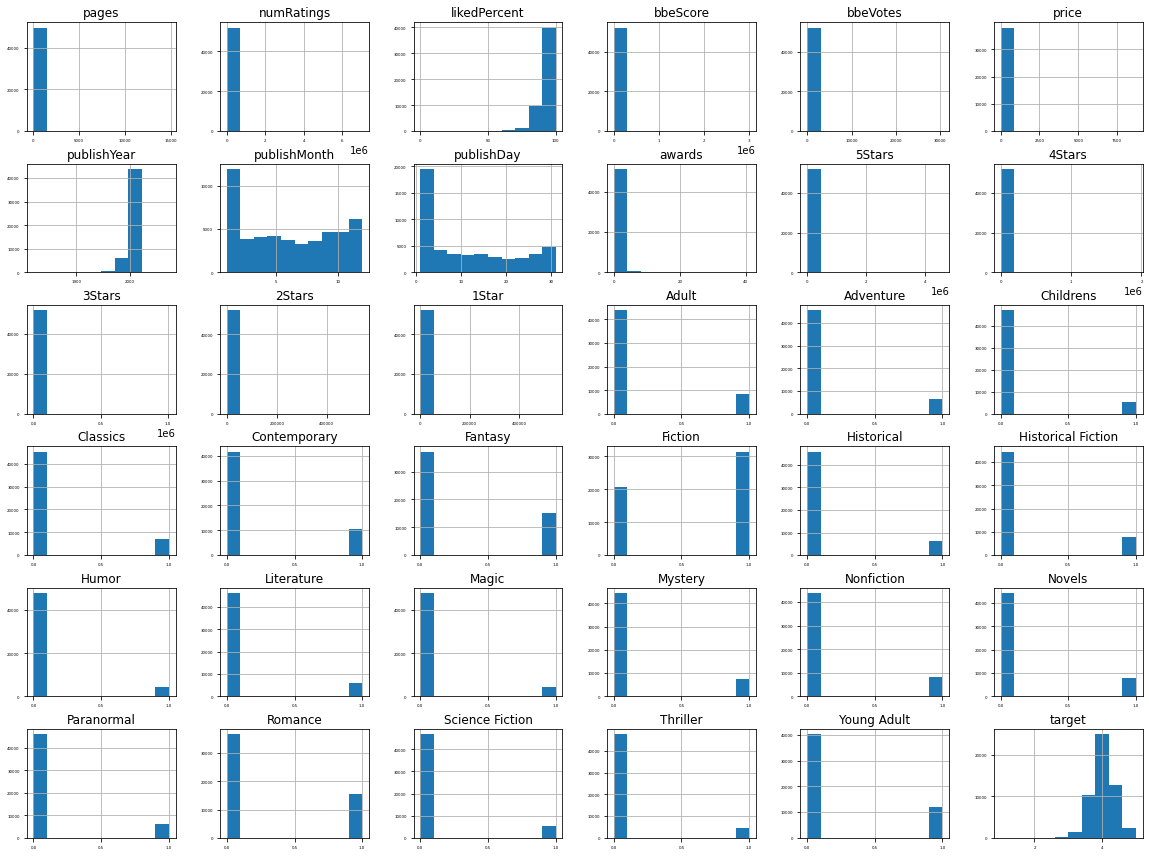

In [99]:
import matplotlib.pyplot as plt

fig = df.hist(figsize=[20,15], xlabelsize=4, ylabelsize=4)

plt.show()

Viendo estas distribuciones podemos aseverar que tenemos espurios, pero no podemos considerar ninguna variable normal (salvo la target), por lo que no podemos utilizar el método SDM para eliminar outliers. Probemos a utilizar el Interquartile Range Method (IQR) y el borrado automático de outliers mediante el Local Outlier Factor (LOF).

#### 2.4.2. Identificación de outliers mediante el Interquartile Range Method (IQR)

In [100]:
df_IQR = df.copy()

for i in df_IQR.iloc[:, 2:8]:
    print(i)
    datos = df_IQR[[i]].values.astype('int64')
    
    q25, q75 = np.percentile(datos, 25), np.percentile(datos, 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    
    outliers = [x for x in datos if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    df_IQR = df_IQR[(df_IQR[i] >= lower) & (df_IQR[i] <= upper)]

pages
Percentiles: 25th=196.000, 75th=386.000, IQR=190.000
Identified outliers: 4534
numRatings
Percentiles: 25th=409.000, 75th=10023.000, IQR=9614.000
Identified outliers: 5967
likedPercent
Percentiles: 25th=89.000, 75th=96.000, IQR=7.000
Identified outliers: 1813
bbeScore
Percentiles: 25th=81.000, 75th=135.000, IQR=54.000
Identified outliers: 5189
bbeVotes
Percentiles: 25th=1.000, 75th=1.000, IQR=0.000
Identified outliers: 6164
price
Percentiles: 25th=-9223372036854775808.000, 75th=6.000, IQR=9223372036854775808.000
Identified outliers: 0


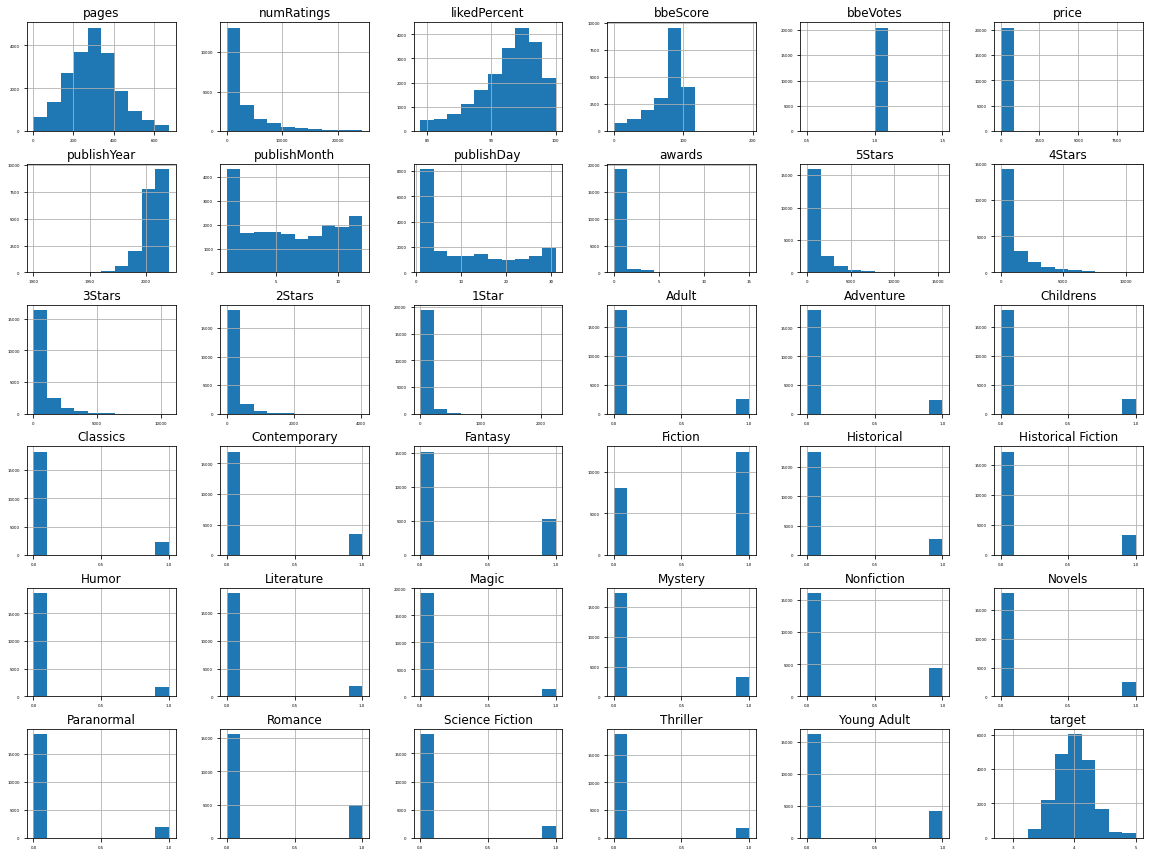

In [101]:
fig = df_IQR.hist(figsize=[20,15], xlabelsize=4, ylabelsize=4)

plt.show()

In [102]:
datasets["IQR"] = df_IQR

Como los nulos los hemos gestionado antes, vamos a eliminar de aquí los nulos también:

#### 2.4.3. Borrado automático de outliers mediante el Local Outlier Factor (LOF)

Para esta técnica vamos a usar el dataset sin nulos generado en el apartado 2.2.df_def ya que este método funciona si no hay nulos.

In [103]:
from sklearn.neighbors import LocalOutlierFactor

for model_name, model in modelos.items():
            
    X = df_def.loc[:500, df_def.columns != 'target']
    y = df_def.loc[:500, df_def.columns == 'target']
    
    # X = df_def.loc[:,df_def.columns != 'target']
    # y = df_def.loc[:,df_def.columns == 'target']
    
    lof = LocalOutlierFactor()
    yhat = lof.fit_predict(X)
    X = X[yhat == -1]
    y = y[yhat == -1]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    model.fit(X_train, y_train.values.ravel())
    y_hat = model.predict(X_test)

    score = mean_squared_error(y_test.values.ravel(), y_hat)

    print(f"Dataset: Original, Modelo: {model_name}, Estrategia de imputado {pip_name}",'RMSE: %.6f' % np.sqrt(score))

Dataset: Original, Modelo: RF, Estrategia de imputado Numerical_BayesianRidge_random RMSE: 0.241801
Dataset: Original, Modelo: RL, Estrategia de imputado Numerical_BayesianRidge_random RMSE: 0.427603
Dataset: Original, Modelo: SVR, Estrategia de imputado Numerical_BayesianRidge_random RMSE: 0.432803


Eliminando los outliers vemos que empeoran los resultados, por lo que a partir de aquí utilizaremos el dataset completo.

### 2.5. Escalado y transformaciones

En esta sección partiremos del dataset obtenido mediante la imputación de nulos con un KNNImputer para la configuración óptima y la codificación de las variables categóricas mediante un OneHotEncoder. Nuestro DataFrame contendrá todavía, por tanto, outliers y valores imputados, variables categóricas dummy y columnas numéricas con distribuciones y escalas no homogéneas.

Nuestro objetivo será, por tanto, obtener una serie de resultados para distintos tratamientos y escalados de las variables numéricas del dataset de partida, pasando por distintos tipos de estandarización, normalización y otras transformaciones.

In [104]:
X = df_def.loc[:1500,df_def.columns != 'target']
y = df_def.loc[:1500,df_def.columns == 'target']

In [105]:
numeric_columns = ['pages', 'numRatings', 'likedPercent', 'bbeScore', 'bbeVotes', 'price',
                   'publishYear', 'publishMonth', 'publishDay', 'awards', '5Stars',
                   '4Stars', '3Stars', '2Stars', '1Star']

Para evaluar los modelos, utilizaremos un Cross Validation K-Fold con 5 splits, e iremos guardando las métricas en un DataFrame de resultados.

In [106]:
scores = pd.DataFrame(columns=['Modelo', 
                               'Estrategia de escalado',
                               'RMSE (mean)',
                               'RMSE (std)',
                               'Escalador'])

Para cada tipo de escalado seguiremos la misma estructura fija:

* Importación del paquete.
* Iteración para recorrer los tres modelos y cada parámtro del algoritmo de escalado.
* Definición del método de escalado aplicado a las variables numéricas o el Pipeline contenedor de dicho método.
* Ejecución del Cross Validation mediante un K-Fold de 5 splits.
* Muestra de los resultados y almacenamiento en el DataFrame de resultados.

In [107]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate 

from sklearn.pipeline import Pipeline

from numpy import mean
from numpy import std

#### 2.5.1. Normalización

Probamos a aplicar un `MinMaxScaler` a nuestros datos y obtenemos los resultados para los modelos.

In [108]:
%%time
from sklearn.preprocessing import MinMaxScaler

for model_name, model in modelos.items():
    
    scal = ColumnTransformer([('numeric',  MinMaxScaler(), numeric_columns)], remainder='passthrough')
    
    pip = Pipeline(steps=[('scaler', scal),
                          ('model',  model)])

    # preparar el procedimiento de cross-validation 
    cv = KFold(n_splits=5)
    # evaluar el modelo
    cv_results = cross_validate(pip, X, y, scoring='neg_root_mean_squared_error', cv=cv)
    
    print('{:s}: {:.2f} ({:.2f})'.format(model_name, 
                                         - mean(cv_results['test_score']), 
                                         std(cv_results['test_score'])))
    
    scores.loc[len(scores)] = [model_name,
                               'Normalization',
                               - mean(cv_results['test_score']),
                               std(cv_results['test_score']),
                               scal]

RF: 0.09 (0.00)
RL: 0.55 (0.91)
SVR: 0.12 (0.03)
CPU times: total: 7.09 s
Wall time: 4.58 s


Finalmente, mostramos los resultados para el método de escalado concreto; en nuestro caso, el de normalización. Finalmente, comparamos los resultados y vemos cuál es el modelo que más éxito tiene.

In [109]:
scores[scores['Estrategia de escalado'] == 'Normalization'].sort_values('RMSE (mean)', ascending=True)

,Modelo,Estrategia de escalado,RMSE (mean),RMSE (std),Escalador
0,RF,Normalization,0.085087,0.002827,"ColumnTransformer(remainder='passthrough',\n ..."
2,SVR,Normalization,0.121318,0.030099,"ColumnTransformer(remainder='passthrough',\n ..."
1,RL,Normalization,0.545928,0.912135,"ColumnTransformer(remainder='passthrough',\n ..."


#### 2.5.2. Estandarización

Pasamos a utilizar un `StandardScaler` en nuestros datos. Los resultados obtenidos son similares.

In [110]:
%%time
from sklearn.preprocessing import StandardScaler

for model_name, model in modelos.items():
    
    scal = ColumnTransformer([('numeric',  StandardScaler(), numeric_columns)], remainder='passthrough')
    
    pip = Pipeline(steps=[('scaler', scal),
                          ('model',  model)])

    # preparar el procedimiento de cross-validation 
    cv = KFold(n_splits=5)
    # evaluar el modelo
    cv_results = cross_validate(pip, X, y, scoring='neg_root_mean_squared_error', cv=cv)
    
    print('{:s}: {:.2f} ({:.2f})'.format(model_name, 
                                         - mean(cv_results['test_score']), 
                                         std(cv_results['test_score'])))
    
    scores.loc[len(scores)] = [model_name,
                               'Standarization',
                               - mean(cv_results['test_score']),
                               std(cv_results['test_score']),
                               scal]

RF: 0.09 (0.00)
RL: 0.55 (0.91)
SVR: 0.12 (0.05)
CPU times: total: 6.3 s
Wall time: 4.55 s


In [111]:
scores[scores['Estrategia de escalado'] == 'Standarization'].sort_values('RMSE (mean)', ascending=True)

,Modelo,Estrategia de escalado,RMSE (mean),RMSE (std),Escalador
3,RF,Standarization,0.085137,0.002793,"ColumnTransformer(remainder='passthrough',\n ..."
5,SVR,Standarization,0.115393,0.046830,"ColumnTransformer(remainder='passthrough',\n ..."
4,RL,Standarization,0.546029,0.912088,"ColumnTransformer(remainder='passthrough',\n ..."


#### 2.5.3. Estandarización mediante Robust Scaling (RS)

Para la estandarización mediante un `RobustScaler`, debemos elegir el valor de `quantile_range` para determinar el rango de cuartiles que ha de tener en cuenta. Tomamos este valor de una lista concreta y añadimos los resultados al grid.

In [112]:
%%time
from sklearn.preprocessing import RobustScaler

for value in [1, 5, 10, 15, 20, 25, 30]:
    for model_name, model in modelos.items():

        scal = ColumnTransformer([('numeric', RobustScaler(quantile_range=(value, 100-value)), numeric_columns)], remainder='passthrough')

        pip = Pipeline(steps=[('scaler', scal),
                              ('model',  model)])

        # preparar el procedimiento de cross-validation 
        cv = KFold(n_splits=5)
        # evaluar el modelo
        cv_results = cross_validate(pip, X, y, scoring='neg_root_mean_squared_error', cv=cv)
        
        print('Quantile Range: ', value)
        print('{:s}: {:.2f} ({:.2f})'.format(model_name, 
                                             - mean(cv_results['test_score']), 
                                             std(cv_results['test_score'])))

        scores.loc[len(scores)] = [model_name,
                                   'RobustScaling - ' + str(value),
                                   - mean(cv_results['test_score']),
                                   std(cv_results['test_score']),
                                   scal]

Quantile Range:  1
RF: 0.09 (0.00)
Quantile Range:  1
RL: 0.55 (0.91)
Quantile Range:  1
SVR: 0.12 (0.04)
Quantile Range:  5
RF: 0.09 (0.00)
Quantile Range:  5
RL: 0.55 (0.91)
Quantile Range:  5
SVR: 0.11 (0.04)
Quantile Range:  10
RF: 0.09 (0.00)
Quantile Range:  10
RL: 0.55 (0.91)
Quantile Range:  10
SVR: 0.11 (0.04)
Quantile Range:  15
RF: 0.09 (0.00)
Quantile Range:  15
RL: 0.55 (0.91)
Quantile Range:  15
SVR: 0.11 (0.05)
Quantile Range:  20
RF: 0.09 (0.00)
Quantile Range:  20
RL: 0.55 (0.91)
Quantile Range:  20
SVR: 0.10 (0.05)
Quantile Range:  25
RF: 0.09 (0.00)
Quantile Range:  25
RL: 0.55 (0.91)
Quantile Range:  25
SVR: 0.10 (0.05)
Quantile Range:  30
RF: 0.09 (0.00)
Quantile Range:  30
RL: 0.55 (0.91)
Quantile Range:  30
SVR: 0.11 (0.05)
CPU times: total: 45.4 s
Wall time: 32.1 s


In [113]:
scores[scores['Estrategia de escalado'].str[0:13] == 'RobustScaling'].sort_values('RMSE (mean)', ascending=True)

,Modelo,Estrategia de escalado,RMSE (mean),RMSE (std),Escalador
12,RF,RobustScaling - 10,0.085048,0.002791,"ColumnTransformer(remainder='passthrough',\n ..."
6,RF,RobustScaling - 1,0.085066,0.002783,"ColumnTransformer(remainder='passthrough',\n ..."
15,RF,RobustScaling - 15,0.085069,0.002852,"ColumnTransformer(remainder='passthrough',\n ..."
9,RF,RobustScaling - 5,0.085070,0.002753,"ColumnTransformer(remainder='passthrough',\n ..."
21,RF,RobustScaling - 25,0.085098,0.002736,"ColumnTransformer(remainder='passthrough',\n ..."
24,RF,RobustScaling - 30,0.085104,0.002828,"ColumnTransformer(remainder='passthrough',\n ..."
18,RF,RobustScaling - 20,0.085115,0.002825,"ColumnTransformer(remainder='passthrough',\n ..."
23,SVR,RobustScaling - 25,0.103662,0.049730,"ColumnTransformer(remainder='passthrough',\n ..."
20,SVR,RobustScaling - 20,0.104435,0.049050,"ColumnTransformer(remainder='passthrough',\n ..."
17,SVR,RobustScaling - 15,0.105676,0.046963,"ColumnTransformer(remainder='passthrough',\n ..."


#### 2.5.4. Transformación de los datos mediante Power Transform (PT)

Para el método de transformación de la distribución de los datos Power Transform, utilizamos los métodos de Yeo-Johnson y Box-Cox. Para este segundo, debemos asegurarnos de que los datos son positivos, por lo que tendremos que aplicar una estandarización previa de los valores de las variables.

In [114]:
%%time
from sklearn.preprocessing import PowerTransformer

for method in ['yeo-johnson'
               # , 'box-cox' # Debemos escalar los valores para hacerlos positivos estrictamente
              ]:
    for standardize in [False, True]:
        for model_name, model in modelos.items():

            scal = ColumnTransformer([('numeric',  PowerTransformer(method=method, standardize=standardize), numeric_columns)], remainder='passthrough')

            pip = Pipeline(steps=[('scaler', scal),
                                  ('model',  model)])

            # preparar el procedimiento de cross-validation 
            cv = KFold(n_splits=5)
            # evaluar el modelo
            cv_results = cross_validate(pip, X, y, scoring='neg_root_mean_squared_error', cv=cv)

            print('PowerTransformation - ' + str(method) + ' - St.: ' + str(standardize))
            print('{:s}: {:.2f} ({:.2f})'.format(model_name, 
                                                 - mean(cv_results['test_score']), 
                                                 std(cv_results['test_score'])))

            scores.loc[len(scores)] = [model_name,
                                       'PowerTransformation - ' + str(method) + ' - St.: ' + str(standardize),
                                       - mean(cv_results['test_score']),
                                       std(cv_results['test_score']),
                                       scal]

PowerTransformation - yeo-johnson - St.: False
RF: 0.09 (0.00)
PowerTransformation - yeo-johnson - St.: False
RL: 0.11 (0.01)
PowerTransformation - yeo-johnson - St.: False
SVR: 0.14 (0.05)
PowerTransformation - yeo-johnson - St.: True
RF: 0.09 (0.00)
PowerTransformation - yeo-johnson - St.: True
RL: 0.05 (0.02)
PowerTransformation - yeo-johnson - St.: True
SVR: 0.09 (0.02)
CPU times: total: 15.8 s
Wall time: 9.62 s


Para evitar posibles problemas futuros, escalamos entre 1 y 2, con el fin de que no exista ningún futuro valor atípico en el conjunto de predicción que se haga negativo.

In [115]:
%%time
from sklearn.preprocessing import PowerTransformer

for method in ['yeo-johnson', 'box-cox']:
    for standardize in [False, True]:
        for model_name, model in modelos.items():

            nor_pt = Pipeline(steps=[('normalize', MinMaxScaler(feature_range=(1, 2))),
                                  ('powertransformation',  PowerTransformer(method=method, standardize=standardize))])
            
            scal = ColumnTransformer([('numeric',  nor_pt, numeric_columns)], remainder='passthrough')

            pip = Pipeline(steps=[('scaler', scal),
                                  ('model',  model)])

            # preparar el procedimiento de cross-validation 
            cv = KFold(n_splits=5)
            # evaluar el modelo
            cv_results = cross_validate(pip, X, y, scoring='neg_root_mean_squared_error', cv=cv)

            print('PowerTransformation - ' + str(method) + ' - PreNormalized - St.: ' + str(standardize))
            print('{:s}: {:.2f} ({:.2f})'.format(model_name, 
                                                 - mean(cv_results['test_score']), 
                                                 std(cv_results['test_score'])))

            scores.loc[len(scores)] = [model_name,
                                       'PowerTransformation - ' + str(method) + ' - PreNormalized - St.: ' + str(standardize),
                                       - mean(cv_results['test_score']),
                                       std(cv_results['test_score']),
                                       scal]

PowerTransformation - yeo-johnson - PreNormalized - St.: False
RF: 0.10 (0.01)
PowerTransformation - yeo-johnson - PreNormalized - St.: False
RL: 0.28 (0.22)
PowerTransformation - yeo-johnson - PreNormalized - St.: False
SVR: 0.11 (0.01)
PowerTransformation - yeo-johnson - PreNormalized - St.: True
RF: 0.09 (0.00)
PowerTransformation - yeo-johnson - PreNormalized - St.: True
RL: 0.07 (0.01)
PowerTransformation - yeo-johnson - PreNormalized - St.: True
SVR: 0.09 (0.01)
PowerTransformation - box-cox - PreNormalized - St.: False
RF: 0.08 (0.00)
PowerTransformation - box-cox - PreNormalized - St.: False
RL: 0.06 (0.01)
PowerTransformation - box-cox - PreNormalized - St.: False
SVR: 0.10 (0.01)
PowerTransformation - box-cox - PreNormalized - St.: True
RF: 0.09 (0.00)
PowerTransformation - box-cox - PreNormalized - St.: True
RL: 0.06 (0.01)
PowerTransformation - box-cox - PreNormalized - St.: True
SVR: 0.08 (0.01)
CPU times: total: 29.7 s
Wall time: 17.7 s


In [116]:
scores[scores['Estrategia de escalado'].str[0:19] == 'PowerTransformation'].sort_values('RMSE (mean)', ascending=True)

,Modelo,Estrategia de escalado,RMSE (mean),RMSE (std),Escalador
31,RL,PowerTransformation - yeo-johnson - St.: True,0.054572,0.016838,"ColumnTransformer(remainder='passthrough',\n ..."
40,RL,PowerTransformation - box-cox - PreNormalized ...,0.061422,0.010055,"ColumnTransformer(remainder='passthrough',\n ..."
43,RL,PowerTransformation - box-cox - PreNormalized ...,0.061422,0.010055,"ColumnTransformer(remainder='passthrough',\n ..."
37,RL,PowerTransformation - yeo-johnson - PreNormali...,0.070943,0.010841,"ColumnTransformer(remainder='passthrough',\n ..."
44,SVR,PowerTransformation - box-cox - PreNormalized ...,0.084248,0.011922,"ColumnTransformer(remainder='passthrough',\n ..."
39,RF,PowerTransformation - box-cox - PreNormalized ...,0.084969,0.002938,"ColumnTransformer(remainder='passthrough',\n ..."
42,RF,PowerTransformation - box-cox - PreNormalized ...,0.085039,0.002854,"ColumnTransformer(remainder='passthrough',\n ..."
27,RF,PowerTransformation - yeo-johnson - St.: False,0.086051,0.002395,"ColumnTransformer(remainder='passthrough',\n ..."
30,RF,PowerTransformation - yeo-johnson - St.: True,0.086051,0.002395,"ColumnTransformer(remainder='passthrough',\n ..."
32,SVR,PowerTransformation - yeo-johnson - St.: True,0.087525,0.019676,"ColumnTransformer(remainder='passthrough',\n ..."


#### 2.5.5. Transformación de los datos mediante Quantile Transform (QT)

Aplicamos un `QuantileTransformer` a los datos para distintos números de cuantiles para los rangos del método y para dos diferentes distribuciones (uniforme y normal).

In [117]:
%%time
from sklearn.preprocessing import QuantileTransformer

for n_quantiles in [10,25,50,75,100,200,500,1000,1500,2000]:
    for output_distribution in ['normal', 'uniform']:
        for model_name, model in modelos.items():

            scal = ColumnTransformer([('numeric',  QuantileTransformer(n_quantiles=n_quantiles, output_distribution=output_distribution), numeric_columns)], remainder='passthrough')

            pip = Pipeline(steps=[('scaler', scal),
                                  ('model',  model)])

            # preparar el procedimiento de cross-validation 
            cv = KFold(n_splits=5)
            # evaluar el modelo
            cv_results = cross_validate(pip, X, y, scoring='neg_root_mean_squared_error', cv=cv)

            print('QuantileTransformation - ' + str(output_distribution) + ' - n_quantiles=' + str(n_quantiles))
            print('{:s}: {:.2f} ({:.2f})'.format(model_name, 
                                                 - mean(cv_results['test_score']), 
                                                 std(cv_results['test_score'])))

            scores.loc[len(scores)] = [model_name,
                                       'QuantileTransformation - ' + str(output_distribution) + ' - n_quantiles=' + str(n_quantiles),
                                       - mean(cv_results['test_score']),
                                       std(cv_results['test_score']),
                                       scal]

QuantileTransformation - normal - n_quantiles=10
RF: 0.09 (0.00)
QuantileTransformation - normal - n_quantiles=10
RL: 0.08 (0.06)
QuantileTransformation - normal - n_quantiles=10
SVR: 0.11 (0.04)
QuantileTransformation - uniform - n_quantiles=10
RF: 0.09 (0.00)
QuantileTransformation - uniform - n_quantiles=10
RL: 0.08 (0.01)
QuantileTransformation - uniform - n_quantiles=10
SVR: 0.09 (0.01)
QuantileTransformation - normal - n_quantiles=25
RF: 0.09 (0.00)
QuantileTransformation - normal - n_quantiles=25
RL: 0.07 (0.04)
QuantileTransformation - normal - n_quantiles=25
SVR: 0.11 (0.04)
QuantileTransformation - uniform - n_quantiles=25
RF: 0.09 (0.00)
QuantileTransformation - uniform - n_quantiles=25
RL: 0.07 (0.01)
QuantileTransformation - uniform - n_quantiles=25
SVR: 0.09 (0.01)
QuantileTransformation - normal - n_quantiles=50
RF: 0.09 (0.00)
QuantileTransformation - normal - n_quantiles=50
RL: 0.07 (0.04)
QuantileTransformation - normal - n_quantiles=50
SVR: 0.11 (0.04)
QuantileTransf

In [118]:
scores[scores['Estrategia de escalado'].str[0:22] == 'QuantileTransformation'].sort_values('RMSE (mean)', ascending=True)

,Modelo,Estrategia de escalado,RMSE (mean),RMSE (std),Escalador
70,RL,QuantileTransformation - normal - n_quantiles=100,0.067026,0.032578,"ColumnTransformer(remainder='passthrough',\n ..."
76,RL,QuantileTransformation - normal - n_quantiles=200,0.067247,0.030934,"ColumnTransformer(remainder='passthrough',\n ..."
64,RL,QuantileTransformation - normal - n_quantiles=75,0.068010,0.034812,"ColumnTransformer(remainder='passthrough',\n ..."
94,RL,QuantileTransformation - normal - n_quantiles=...,0.068743,0.032597,"ColumnTransformer(remainder='passthrough',\n ..."
100,RL,QuantileTransformation - normal - n_quantiles=...,0.068743,0.032597,"ColumnTransformer(remainder='passthrough',\n ..."
88,RL,QuantileTransformation - normal - n_quantiles=...,0.069205,0.033134,"ColumnTransformer(remainder='passthrough',\n ..."
82,RL,QuantileTransformation - normal - n_quantiles=500,0.069454,0.033428,"ColumnTransformer(remainder='passthrough',\n ..."
58,RL,QuantileTransformation - normal - n_quantiles=50,0.070828,0.038646,"ColumnTransformer(remainder='passthrough',\n ..."
52,RL,QuantileTransformation - normal - n_quantiles=25,0.072243,0.042915,"ColumnTransformer(remainder='passthrough',\n ..."
73,RL,QuantileTransformation - uniform - n_quantiles...,0.073937,0.014225,"ColumnTransformer(remainder='passthrough',\n ..."


#### 2.5.6. Discretización de los datos mediante KBinsDiscretizer (KBD)

Por último, aplicamos un `KBinsDiscretizer` para discretizar nuestros datos en base a diferentes números de intervalos y distintas estrategias. Desgraciadamente, las distribuciones del dataset no se comportan correctamente con el método `'kmeans'`, por lo que tenemos que descartarlo.

In [119]:
%%time
from sklearn.preprocessing import KBinsDiscretizer

for n_bins in range(8,13):
    for encode in ['onehot', 'onehot-dense', 'ordinal']:
        for strategy in ['uniform', 'quantile', 
                         # 'kmeans'
                        ]:
            for model_name, model in modelos.items():

                scal = ColumnTransformer([('numeric',  KBinsDiscretizer(n_bins=n_bins, encode=encode, strategy=strategy), numeric_columns)], remainder='passthrough')

                pip = Pipeline(steps=[('scaler', scal),
                                      ('model',  model)])

                # preparar el procedimiento de cross-validation 
                cv = KFold(n_splits=5)
                # evaluar el modelo
                cv_results = cross_validate(pip, X, y, scoring='neg_root_mean_squared_error', cv=cv)

                print('KBinsDiscretization - ' + str(strategy) + ' (' + str(encode) + ') - n_bins=' + str(n_bins))
                print('{:s}: {:.2f} ({:.2f})'.format(model_name, 
                                                     - mean(cv_results['test_score']), 
                                                     std(cv_results['test_score'])))

                scores.loc[len(scores)] = [model_name,
                                           'KBinsDiscretization - ' + str(strategy) + ' (' + str(encode) + ') - n_bins=' + str(n_bins),
                                           - mean(cv_results['test_score']),
                                           std(cv_results['test_score']),
                                           scal]

KBinsDiscretization - uniform (onehot) - n_bins=8
RF: 0.11 (0.00)
KBinsDiscretization - uniform (onehot) - n_bins=8
RL: 269974360639.88 (382782793887.84)
KBinsDiscretization - uniform (onehot) - n_bins=8
SVR: 0.12 (0.01)
KBinsDiscretization - quantile (onehot) - n_bins=8
RF: 0.11 (0.01)
KBinsDiscretization - quantile (onehot) - n_bins=8
RL: 368468839691.69 (359988612749.93)
KBinsDiscretization - quantile (onehot) - n_bins=8
SVR: 0.11 (0.01)
KBinsDiscretization - uniform (onehot-dense) - n_bins=8
RF: 0.11 (0.00)
KBinsDiscretization - uniform (onehot-dense) - n_bins=8
RL: 269974360639.88 (382782793887.84)
KBinsDiscretization - uniform (onehot-dense) - n_bins=8
SVR: 0.12 (0.01)
KBinsDiscretization - quantile (onehot-dense) - n_bins=8
RF: 0.11 (0.01)
KBinsDiscretization - quantile (onehot-dense) - n_bins=8
RL: 368468839691.69 (359988612749.93)
KBinsDiscretization - quantile (onehot-dense) - n_bins=8
SVR: 0.11 (0.01)
KBinsDiscretization - uniform (ordinal) - n_bins=8
RF: 0.11 (0.01)
KBinsDi

En la siguiente celda podemos ver el resultado que obtenemos si tratamos de probar el método con los datos bajo la estrategia K-Means. Obtenemos valores `nan` en las medias y desviaciones típicas.

In [120]:
%%time
from sklearn.preprocessing import KBinsDiscretizer

for n_bins in [8]:
    for encode in ['onehot', 'onehot-dense', 'ordinal']:
        for strategy in ['kmeans']:
            for model_name, model in modelos.items():

                nor_pt_kbd = Pipeline(steps=[('normalize', MinMaxScaler(feature_range=(0, 1))),
                                      ('powertransformation',  PowerTransformer(method='yeo-johnson')),
                                        ('KBD_Kmeans', KBinsDiscretizer(n_bins=n_bins, encode=encode, strategy=strategy))])

                scal = ColumnTransformer([('numeric',  nor_pt_kbd, numeric_columns)], remainder='passthrough')

                pip = Pipeline(steps=[('scaler', scal),
                                      ('model',  model)])

                # preparar el procedimiento de cross-validation 
                cv = KFold(n_splits=5)
                # evaluar el modelo
                cv_results = cross_validate(pip, X, y, scoring='neg_root_mean_squared_error', cv=cv)

                print('KBinsDiscretization - ' + str(strategy) + ' (' + str(encode) + ') - n_bins=' + str(n_bins))
                print('{:s}: {:.2f} ({:.2f})'.format(model_name, 
                                                     - mean(cv_results['test_score']), 
                                                     std(cv_results['test_score'])))

                # scores.loc[len(scores)] = [model_name,
                #                            'KBinsDiscretization - ' + str(strategy) + ' (' + str(encode) + ') - n_bins=' + str(n_bins),
                #                            - mean(cv_results['test_score']),
                #                            std(cv_results['test_score']),
                #                            scal]

KBinsDiscretization - kmeans (onehot) - n_bins=8
RF: 0.10 (0.01)
KBinsDiscretization - kmeans (onehot) - n_bins=8
RL: 182022174825.37 (250638616211.09)
KBinsDiscretization - kmeans (onehot) - n_bins=8
SVR: 0.12 (0.01)
KBinsDiscretization - kmeans (onehot-dense) - n_bins=8
RF: 0.10 (0.01)
KBinsDiscretization - kmeans (onehot-dense) - n_bins=8
RL: 182022174825.37 (250638616211.09)
KBinsDiscretization - kmeans (onehot-dense) - n_bins=8
SVR: 0.12 (0.01)
KBinsDiscretization - kmeans (ordinal) - n_bins=8
RF: 0.09 (0.00)
KBinsDiscretization - kmeans (ordinal) - n_bins=8
RL: 0.08 (0.01)
KBinsDiscretization - kmeans (ordinal) - n_bins=8
SVR: 0.08 (0.01)
CPU times: total: 12min 28s
Wall time: 1min 4s


Vemos que el error radica en que no es capaz de determinar una configuración adecuada. El error puede deberse a que la distribución de los datos es demasiado dispar en algunas variables, lo que hace que sea más complicado determinar los intervalos. Esto podría, quizá, solucionarse utilizando un método de identificación de outliers previamente.

In [121]:
# nor_pt_kbd = Pipeline(steps=[('normalize', MinMaxScaler(feature_range=(0, 1))),
#                       ('powertransformation',  PowerTransformer(method='yeo-johnson')),
#                         ('KBD_Kmeans', KBinsDiscretizer(n_bins=8, encode='onehot', strategy='kmeans'))])

# scal = ColumnTransformer([('numeric',  nor_pt_kbd, numeric_columns)], remainder='passthrough')

# pip = Pipeline(steps=[('scaler', scal),
#                       ('model',  model)])

# pip.fit(X)
# X_scal_aux = pip.transform(X)

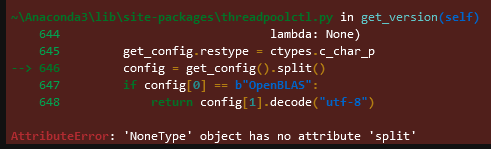

In [122]:
scores[scores['Estrategia de escalado'].str[0:19] == 'KBinsDiscretization'].sort_values('RMSE (mean)', ascending=True)

,Modelo,Estrategia de escalado,RMSE (mean),RMSE (std),Escalador
181,RL,KBinsDiscretization - quantile (onehot) - n_bi...,7.027775e-02,1.033021e-02,"ColumnTransformer(remainder='passthrough',\n ..."
169,RL,KBinsDiscretization - quantile (onehot-dense) ...,7.051469e-02,1.176822e-02,"ColumnTransformer(remainder='passthrough',\n ..."
163,RL,KBinsDiscretization - quantile (onehot) - n_bi...,7.051469e-02,1.176822e-02,"ColumnTransformer(remainder='passthrough',\n ..."
194,SVR,KBinsDiscretization - quantile (ordinal) - n_b...,7.461505e-02,1.373155e-02,"ColumnTransformer(remainder='passthrough',\n ..."
193,RL,KBinsDiscretization - quantile (ordinal) - n_b...,7.530219e-02,1.452484e-02,"ColumnTransformer(remainder='passthrough',\n ..."
...,...,...,...,...,...
142,RL,KBinsDiscretization - uniform (onehot) - n_bin...,3.356952e+11,5.870621e+11,"ColumnTransformer(remainder='passthrough',\n ..."
115,RL,KBinsDiscretization - quantile (onehot-dense) ...,3.684688e+11,3.599886e+11,"ColumnTransformer(remainder='passthrough',\n ..."
109,RL,KBinsDiscretization - quantile (onehot) - n_bi...,3.684688e+11,3.599886e+11,"ColumnTransformer(remainder='passthrough',\n ..."
166,RL,KBinsDiscretization - uniform (onehot-dense) -...,3.862603e+11,5.911365e+11,"ColumnTransformer(remainder='passthrough',\n ..."


#### 2.5.7. Contraste de resultados

Vemos que los mejores métodos de escalado que podemos identificar para nuestro problema son los Power Transformers y los Quantile Transformers.

In [123]:
scores.sort_values('RMSE (mean)', ascending=True).head(10)

,Modelo,Estrategia de escalado,RMSE (mean),RMSE (std),Escalador
31,RL,PowerTransformation - yeo-johnson - St.: True,0.054572,0.016838,"ColumnTransformer(remainder='passthrough',\n ..."
40,RL,PowerTransformation - box-cox - PreNormalized ...,0.061422,0.010055,"ColumnTransformer(remainder='passthrough',\n ..."
43,RL,PowerTransformation - box-cox - PreNormalized ...,0.061422,0.010055,"ColumnTransformer(remainder='passthrough',\n ..."
70,RL,QuantileTransformation - normal - n_quantiles=100,0.067026,0.032578,"ColumnTransformer(remainder='passthrough',\n ..."
76,RL,QuantileTransformation - normal - n_quantiles=200,0.067247,0.030934,"ColumnTransformer(remainder='passthrough',\n ..."
64,RL,QuantileTransformation - normal - n_quantiles=75,0.068010,0.034812,"ColumnTransformer(remainder='passthrough',\n ..."
94,RL,QuantileTransformation - normal - n_quantiles=...,0.068743,0.032597,"ColumnTransformer(remainder='passthrough',\n ..."
100,RL,QuantileTransformation - normal - n_quantiles=...,0.068743,0.032597,"ColumnTransformer(remainder='passthrough',\n ..."
88,RL,QuantileTransformation - normal - n_quantiles=...,0.069205,0.033134,"ColumnTransformer(remainder='passthrough',\n ..."
82,RL,QuantileTransformation - normal - n_quantiles=500,0.069454,0.033428,"ColumnTransformer(remainder='passthrough',\n ..."


En las posteriores apartados trabajaremos con el dataset obtenido de aplicar la mejor técnica (aquella que haya dado un mejor resultado).

In [124]:
X_scal = pd.DataFrame(scores.sort_values('RMSE (mean)', ascending=True).reset_index().loc[0,'Escalador'].fit_transform(X),
                     columns = X.columns)
X_scal

,pages,numRatings,likedPercent,bbeScore,bbeVotes,price,publishYear,publishMonth,publishDay,awards,...,x0_Romanian,x0_Russian,x0_Spanish,x0_Swedish,x0_Turkish,x0_nan,x1_Digital,x1_Hardcover,x1_Paperback,x1_nan
0,0.036449,3.889668,0.97737,2.076857,2.120919,0.155443,0.355131,0.800487,0.337433,2.137796,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.627188,2.66361,1.914966,2.065692,2.107529,0.727047,-0.064841,0.800487,1.183032,1.59853,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.208139,3.410156,0.57396,2.052021,2.091316,-0.239766,0.14536,-0.354878,0.921635,1.127204,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.455568,2.884162,0.209199,2.038795,2.075546,0.053047,-0.486538,1.075572,-0.002322,-1.064248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.55709,3.54232,-2.445459,2.005647,2.033552,-1.331069,0.14536,0.800487,-0.440386,2.004474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.14906,-1.095435,-0.41753,-1.588905,-1.146362,1.815276,-1.335155,-1.665585,-1.368185,-1.064248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1496,-0.912901,-0.407372,-0.41753,-1.591017,-1.200634,-0.627393,0.14536,-0.662355,-1.368185,-1.064248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1497,2.314732,-1.644331,0.209199,-1.591546,-1.770187,0.225733,-0.170103,1.613347,-1.107836,-1.064248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1498,0.578946,-0.577655,0.97737,-1.592075,-1.639783,-1.630963,0.877682,1.075572,0.412505,-1.064248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### 2.6. Estudio de importancia (FI) de las variables

A continuación vamos a realizar un estudio sobre el grado de importancia de cada variable de nuestro dataset en el problema de regresión.

La intuición nos puede decir que variables como `'likedPercent'`, `'5Stars'` o `'1Star'` van a tener mucha importancia, pero conviene realizar un estudio más en profundidad para entender qué están haciendo realmente los algoritmos.

#### 2.6.1. Linear Regression FI

Hemos visto que uno de los mejores algoritmos que podemos utilizar en nuestro problema es preciasmente el de Regresión Lineal. Esto tiene sentido, ya que nuestra variable objetivo tiene una fuete dependencia lineal con el resto de variables explicativas. Veamos cuáles influyen más en ella.

In [125]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

In [126]:
# define the model
model = LinearRegression()
# fit the model
model.fit(X_scal, y)
# get importance
importance = model.coef_.T
print(model.coef_.shape)
# summarize feature importance. Los de mayor rango positivo las variables que más importancia tienen para el modelo.
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

(1, 60)
Feature: 0, Score: -0.00143
Feature: 1, Score: -0.57230
Feature: 2, Score: 0.14107
Feature: 3, Score: 0.16106
Feature: 4, Score: -0.15139
Feature: 5, Score: 0.00470
Feature: 6, Score: 0.00364
Feature: 7, Score: 0.00023
Feature: 8, Score: 0.00070
Feature: 9, Score: 0.00078
Feature: 10, Score: 0.59448
Feature: 11, Score: -0.07511
Feature: 12, Score: -0.01871
Feature: 13, Score: 0.05249
Feature: 14, Score: 0.02749
Feature: 15, Score: -0.00413
Feature: 16, Score: -0.00208
Feature: 17, Score: 0.00437
Feature: 18, Score: -0.00977
Feature: 19, Score: -0.00491
Feature: 20, Score: -0.00452
Feature: 21, Score: -0.05806
Feature: 22, Score: 0.00354
Feature: 23, Score: -0.00301
Feature: 24, Score: -0.00543
Feature: 25, Score: 0.00005
Feature: 26, Score: -0.00624
Feature: 27, Score: -0.00180
Feature: 28, Score: -0.04748
Feature: 29, Score: 0.00404
Feature: 30, Score: -0.00884
Feature: 31, Score: -0.01093
Feature: 32, Score: 0.00034
Feature: 33, Score: 0.00179
Feature: 34, Score: -0.00334
Fea

Vemos que las más importantes son precisamente las que habíamos identificado, especialmente `'5Stars'`, junto con la especial ayuda de `'numRatings'`. Esto tiene sentido, ya que la regresión lineal está calculando el número de 5 estrellas respecto al número de votos y analizando qué porcentaje de ellas representan el total. También son importantes (positivamente) el `'bbeScore'` y `'bbeVotes'`, que indican la popularidad, y (negativamente) `'price'`.

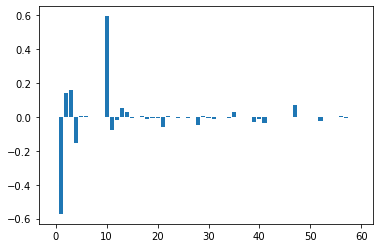

In [127]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance[:,0])
pyplot.show()

#### 2.6.2. CART FI

Veamos ahora la importancia de las características para un árbol de decisión.

In [128]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

In [129]:
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_   
print(model.feature_importances_.shape)
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

(60,)
Feature: 0, Score: 0.02827
Feature: 1, Score: 0.00165
Feature: 2, Score: 0.77234
Feature: 3, Score: 0.00844
Feature: 4, Score: 0.00582
Feature: 5, Score: 0.01048
Feature: 6, Score: 0.01113
Feature: 7, Score: 0.00357
Feature: 8, Score: 0.00519
Feature: 9, Score: 0.00608
Feature: 10, Score: 0.03561
Feature: 11, Score: 0.00709
Feature: 12, Score: 0.06710
Feature: 13, Score: 0.00369
Feature: 14, Score: 0.00757
Feature: 15, Score: 0.00060
Feature: 16, Score: 0.00194
Feature: 17, Score: 0.00021
Feature: 18, Score: 0.00045
Feature: 19, Score: 0.00086
Feature: 20, Score: 0.00004
Feature: 21, Score: 0.00027
Feature: 22, Score: 0.00002
Feature: 23, Score: 0.00136
Feature: 24, Score: 0.00064
Feature: 25, Score: 0.00378
Feature: 26, Score: 0.00126
Feature: 27, Score: 0.00179
Feature: 28, Score: 0.00287
Feature: 29, Score: 0.00059
Feature: 30, Score: 0.00237
Feature: 31, Score: 0.00026
Feature: 32, Score: 0.00177
Feature: 33, Score: 0.00184
Feature: 34, Score: 0.00070
Feature: 35, Score: 0.00

Vemos ahora que la característica más importante es, sobre todo, `'likedPercent'`, como advertíamos al principio de la sección. También influyen `'5Stars'`, `'3Stars'` y `'pages'`, aunque en mucha menor medida.

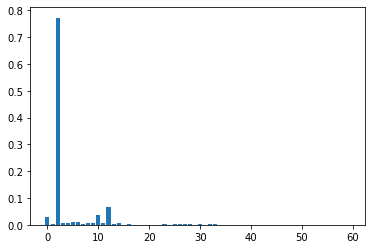

In [130]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#### 2.6.3. Random Forest FI

Pasemos ahora a ver la importancia de las características según un `RandomForest`.

In [131]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

In [132]:
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
print(model.feature_importances_.shape)
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

(60,)
Feature: 0, Score: 0.03107
Feature: 1, Score: 0.00349
Feature: 2, Score: 0.76823
Feature: 3, Score: 0.01221
Feature: 4, Score: 0.00651
Feature: 5, Score: 0.02068
Feature: 6, Score: 0.01677
Feature: 7, Score: 0.00498
Feature: 8, Score: 0.00540
Feature: 9, Score: 0.00404
Feature: 10, Score: 0.02489
Feature: 11, Score: 0.01431
Feature: 12, Score: 0.03801
Feature: 13, Score: 0.00686
Feature: 14, Score: 0.00917
Feature: 15, Score: 0.00102
Feature: 16, Score: 0.00089
Feature: 17, Score: 0.00042
Feature: 18, Score: 0.00226
Feature: 19, Score: 0.00116
Feature: 20, Score: 0.00098
Feature: 21, Score: 0.00105
Feature: 22, Score: 0.00072
Feature: 23, Score: 0.00211
Feature: 24, Score: 0.00063
Feature: 25, Score: 0.00259
Feature: 26, Score: 0.00117
Feature: 27, Score: 0.00397
Feature: 28, Score: 0.00143
Feature: 29, Score: 0.00189
Feature: 30, Score: 0.00136
Feature: 31, Score: 0.00116
Feature: 32, Score: 0.00108
Feature: 33, Score: 0.00121
Feature: 34, Score: 0.00182
Feature: 35, Score: 0.00

Las conclusiones son similares a las del árbol de decisión, basándose principalmente en `'likedPercent'`.

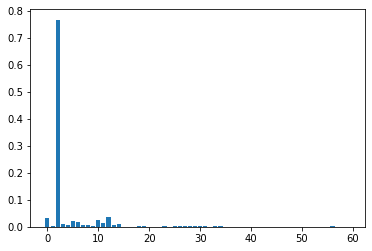

In [133]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#### 2.6.4. Permutation FI

Utilicemos finalmente un modelo KNN para calcular el grado de importancia por permutación.

In [134]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

In [135]:
# define the model
model = KNeighborsRegressor()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00004
Feature: 1, Score: 0.08741
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00893
Feature: 4, Score: 0.00001
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.13357
Feature: 11, Score: 0.01421
Feature: 12, Score: 0.05721
Feature: 13, Score: 0.01141
Feature: 14, Score: 0.00222
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

Al igual que como ocurría con el modelo de regresión lineal, los índices de importancia por permutación nos dicen que las variables más relevantes son `'5Stars'` y `'3Stars'` (positivamente) respecto a `'numRatings'`. También tiene en cuenta el resto de indicadores de estrellas y el `'bbeScore'`.

In [136]:
X_scal.columns

Index(['pages', 'numRatings', 'likedPercent', 'bbeScore', 'bbeVotes', 'price',
       'publishYear', 'publishMonth', 'publishDay', 'awards', '5Stars',
       '4Stars', '3Stars', '2Stars', '1Star', 'Adult', 'Adventure',
       'Childrens', 'Classics', 'Contemporary', 'Fantasy', 'Fiction',
       'Historical', 'Historical Fiction', 'Humor', 'Literature', 'Magic',
       'Mystery', 'Nonfiction', 'Novels', 'Paranormal', 'Romance',
       'Science Fiction', 'Thriller', 'Young Adult', 'x0_Arabic', 'x0_Bengali',
       'x0_Bulgarian', 'x0_Dutch', 'x0_English', 'x0_French', 'x0_German',
       'x0_Greek', 'x0_Indonesian', 'x0_Italian', 'x0_Japanese', 'x0_Malay',
       'x0_Persian', 'x0_Polish', 'x0_Portuguese', 'x0_Romanian', 'x0_Russian',
       'x0_Spanish', 'x0_Swedish', 'x0_Turkish', 'x0_nan', 'x1_Digital',
       'x1_Hardcover', 'x1_Paperback', 'x1_nan'],
      dtype='object')

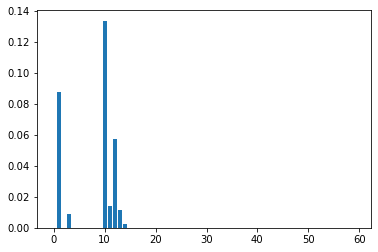

In [137]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### 2.7. Selección de características (FS)

Una vez hemos analizado la importancia de las características, pasemos a seleccionar aquellas con mayor relevancia en nuestros modelos y a obtener sus resultados asociados.

Para ello, importamos los paquetes necesarios y creamos de nuevo un DataFrame que contenga todos nuestros resultados para cada modelo, estrategia de FS y número de características.

In [138]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate 

from sklearn.pipeline import Pipeline

from numpy import mean
from numpy import std

from sklearn.model_selection import train_test_split

from matplotlib import pyplot

In [139]:
scoresFS = pd.DataFrame(columns=['Modelo', 
                               'Estrategia de selección de características',
                               'Número de características',
                               'RMSE (mean)',
                               'RMSE (std)',
                               'Selector'])

#### 2.7.1. FS en base al coeficiente de correlación

El FS mediante el coeficiente de correlación se aplica al tener únicamente variables numéricas. No es nuestro caso, por lo que nos saltan errores si lo aplicamos a todo el conjunto de datos.

In [140]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [141]:
# split into train and test sets  
X_train, X_test, y_train, y_test = train_test_split(X_scal, y, test_size=0.2, random_state=1)

In [142]:
# # feature selection
# def select_features(X_train, y_train, X_test):
#     # configure to select all features
#     fs = SelectKBest(score_func=f_regression, k='all')
#     # learn relationship from training data
#     fs.fit(X_train, y_train)
#     # transform train input data
#     X_train_fs = fs.transform(X_train)
#     # transform test input data
#     X_test_fs = fs.transform(X_test)
#     return X_train_fs, X_test_fs, fs

# # feature selection
# X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# # what are scores for the features
# for i in range(len(fs.scores_)):
#     print('Feature %d: %f' % (i, fs.scores_[i]))

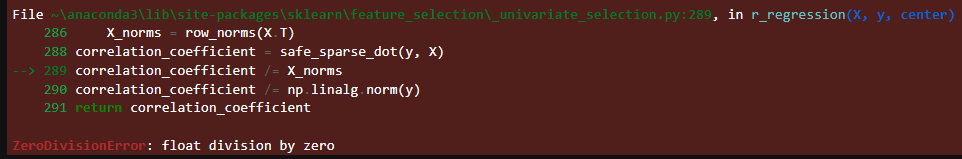

Concretamente nos da un "float division by zero". Esto es debido a que, como hay variables categóricas codificadas, existen columnas con varianza cero (que, evidentemente, no aportan información al resultado).

In [143]:
X_scal.std()[X_scal.std() == 0]

x0_Bengali       0.0
x0_Bulgarian     0.0
x0_Dutch         0.0
x0_Greek         0.0
x0_Indonesian    0.0
x0_Italian       0.0
x0_Japanese      0.0
x0_Malay         0.0
x0_Polish        0.0
x0_Portuguese    0.0
x0_Romanian      0.0
x0_Russian       0.0
x0_Swedish       0.0
x0_Turkish       0.0
dtype: float64

Si tomamos únicmanete las columnas numéricas sí obtenemos resultados, interesantes de estudiar. Tendremos en cuenta los resultados, pero no utilizaremos este método para posteriores apartados (ya que no tiene en cuenta las variables categóricas).

In [144]:
# split into train and test sets  
X_train, X_test, y_train, y_test = train_test_split(X_scal[numeric_columns].astype('float64'), y.astype('float64'), test_size=0.2, random_state=1)

In [145]:
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 47.974567
Feature 1: 10.377981
Feature 2: 4253.172557
Feature 3: 1.359954
Feature 4: 0.016570
Feature 5: 144.270705
Feature 6: 8.079315
Feature 7: 0.766765
Feature 8: 0.084906
Feature 9: 1.159606
Feature 10: 7.675001
Feature 11: 20.188967
Feature 12: 135.186845
Feature 13: 252.196359
Feature 14: 189.234478


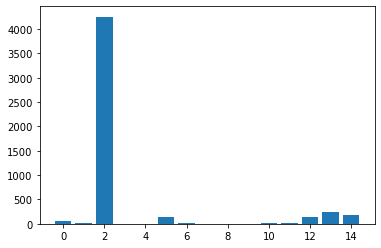

In [146]:
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [147]:
%%time

for model_name, model in modelos.items():
    for k in range(2,len(numeric_columns)):
    
        fs = SelectKBest(score_func=f_regression, k=k)

        pip = Pipeline(steps=[('fs', fs),
                              ('model',  model)])

        # preparar el procedimiento de cross-validation 
        cv = KFold(n_splits=5)
        # evaluar el modelo
        cv_results = cross_validate(pip, X_scal[numeric_columns].astype('float64'), y.astype('float64'), scoring='neg_root_mean_squared_error', cv=cv)

        print('MutualInformation (' + str(k) + ')')
        print('{:s}: {:.2f} ({:.2f})'.format(model_name, 
                                             - mean(cv_results['test_score']), 
                                             std(cv_results['test_score'])))

        scoresFS.loc[len(scoresFS)] = [model_name,
                                   'CorrelationCoefficient',
                                   k,
                                   - mean(cv_results['test_score']),
                                   std(cv_results['test_score']),
                                   fs]

MutualInformation (2)
RF: 0.12 (0.00)
MutualInformation (3)
RF: 0.09 (0.00)
MutualInformation (4)
RF: 0.08 (0.01)
MutualInformation (5)
RF: 0.08 (0.00)
MutualInformation (6)
RF: 0.09 (0.00)
MutualInformation (7)
RF: 0.08 (0.00)
MutualInformation (8)
RF: 0.08 (0.00)
MutualInformation (9)
RF: 0.08 (0.00)
MutualInformation (10)
RF: 0.08 (0.00)
MutualInformation (11)
RF: 0.08 (0.00)
MutualInformation (12)
RF: 0.08 (0.00)
MutualInformation (13)
RF: 0.08 (0.00)
MutualInformation (14)
RF: 0.08 (0.00)
MutualInformation (2)
RL: 0.11 (0.00)
MutualInformation (3)
RL: 0.08 (0.01)
MutualInformation (4)
RL: 0.08 (0.01)
MutualInformation (5)
RL: 0.07 (0.01)
MutualInformation (6)
RL: 0.07 (0.02)
MutualInformation (7)
RL: 0.07 (0.01)
MutualInformation (8)
RL: 0.06 (0.01)
MutualInformation (9)
RL: 0.06 (0.02)
MutualInformation (10)
RL: 0.06 (0.02)
MutualInformation (11)
RL: 0.05 (0.01)
MutualInformation (12)
RL: 0.05 (0.01)
MutualInformation (13)
RL: 0.05 (0.01)
MutualInformation (14)
RL: 0.05 (0.01)
Mu

In [148]:
scoresFS[scoresFS['Estrategia de selección de características'] == 'CorrelationCoefficient'].sort_values('RMSE (mean)', ascending=True)

,Modelo,Estrategia de selección de características,Número de características,RMSE (mean),RMSE (std),Selector
24,RL,CorrelationCoefficient,13,0.052502,0.013072,"SelectKBest(k=13, score_func=<function f_regre..."
25,RL,CorrelationCoefficient,14,0.052520,0.013058,"SelectKBest(k=14, score_func=<function f_regre..."
23,RL,CorrelationCoefficient,12,0.053085,0.013086,"SelectKBest(k=12, score_func=<function f_regre..."
22,RL,CorrelationCoefficient,11,0.054425,0.014816,"SelectKBest(k=11, score_func=<function f_regre..."
21,RL,CorrelationCoefficient,10,0.055649,0.016680,SelectKBest(score_func=<function f_regression ...
20,RL,CorrelationCoefficient,9,0.058724,0.015642,"SelectKBest(k=9, score_func=<function f_regres..."
19,RL,CorrelationCoefficient,8,0.062426,0.013395,"SelectKBest(k=8, score_func=<function f_regres..."
18,RL,CorrelationCoefficient,7,0.068547,0.013476,"SelectKBest(k=7, score_func=<function f_regres..."
28,SVR,CorrelationCoefficient,4,0.069524,0.011954,"SelectKBest(k=4, score_func=<function f_regres..."
32,SVR,CorrelationCoefficient,8,0.071179,0.018019,"SelectKBest(k=8, score_func=<function f_regres..."


#### 2.7.3. FS mediante Mutual Information (MI)

Para poder extraer las variables de mayor importancia contemplando comportamientos no lineales (como los que encontramos en variables categóricas y muchas de las variables numéricas), necesitamos emplear técnicas como la de Mutual Information, basada en la información mutua entre variables aleatorias.

In [149]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [150]:
# split into train and test sets  
X_train, X_test, y_train, y_test = train_test_split(X_scal, y, test_size=0.2, random_state=1)

In [151]:
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.071697
Feature 1: 0.061732
Feature 2: 0.816438
Feature 3: 0.022076
Feature 4: 0.000001
Feature 5: 0.091443
Feature 6: 0.062536
Feature 7: 0.013874
Feature 8: 0.000000
Feature 9: 0.029862
Feature 10: 0.072816
Feature 11: 0.076129
Feature 12: 0.131625
Feature 13: 0.136807
Feature 14: 0.155250
Feature 15: 0.000000
Feature 16: 0.006380
Feature 17: 0.014903
Feature 18: 0.013769
Feature 19: 0.012475
Feature 20: 0.000000
Feature 21: 0.023026
Feature 22: 0.014437
Feature 23: 0.003024
Feature 24: 0.000000
Feature 25: 0.059655
Feature 26: 0.004253
Feature 27: 0.004214
Feature 28: 0.015337
Feature 29: 0.032237
Feature 30: 0.000000
Feature 31: 0.002567
Feature 32: 0.003588
Feature 33: 0.000000
Feature 34: 0.032665
Feature 35: 0.007329
Feature 36: 0.000000
Feature 37: 0.003695
Feature 38: 0.001305
Feature 39: 0.009472
Feature 40: 0.004267
Feature 41: 0.001793
Feature 42: 0.000000
Feature 43: 0.000000
Feature 44: 0.000000
Feature 45: 0.003365
Feature 46: 0.000000
Feature 47: 0.000000
Fe

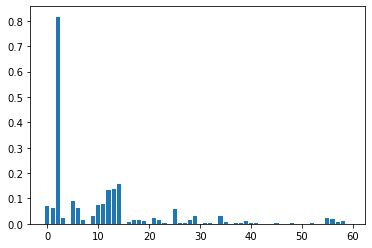

In [152]:
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [153]:
%%time

for model_name, model in modelos.items():
    for k in range(2,len(X_train.columns)):
    
        fs = SelectKBest(score_func=mutual_info_regression, k=k)

        pip = Pipeline(steps=[('fs', fs),
                              ('model',  model)])

        # preparar el procedimiento de cross-validation 
        cv = KFold(n_splits=5)
        # evaluar el modelo
        cv_results = cross_validate(pip, X_scal, y, scoring='neg_root_mean_squared_error', cv=cv)

        print('MutualInformation (' + str(k) + ')')
        print('{:s}: {:.2f} ({:.2f})'.format(model_name, 
                                             - mean(cv_results['test_score']), 
                                             std(cv_results['test_score'])))

        scoresFS.loc[len(scoresFS)] = [model_name,
                                   'MutualInformation',
                                   k,
                                   - mean(cv_results['test_score']),
                                   std(cv_results['test_score']),
                                   fs]

MutualInformation (2)
RF: 0.12 (0.01)
MutualInformation (3)
RF: 0.09 (0.01)
MutualInformation (4)
RF: 0.08 (0.01)
MutualInformation (5)
RF: 0.08 (0.01)
MutualInformation (6)
RF: 0.08 (0.01)
MutualInformation (7)
RF: 0.08 (0.01)
MutualInformation (8)
RF: 0.08 (0.01)
MutualInformation (9)
RF: 0.08 (0.00)
MutualInformation (10)
RF: 0.08 (0.00)
MutualInformation (11)
RF: 0.08 (0.00)
MutualInformation (12)
RF: 0.08 (0.00)
MutualInformation (13)
RF: 0.08 (0.00)
MutualInformation (14)
RF: 0.08 (0.00)
MutualInformation (15)
RF: 0.08 (0.00)
MutualInformation (16)
RF: 0.08 (0.00)
MutualInformation (17)
RF: 0.08 (0.00)
MutualInformation (18)
RF: 0.08 (0.00)
MutualInformation (19)
RF: 0.08 (0.00)
MutualInformation (20)
RF: 0.08 (0.00)
MutualInformation (21)
RF: 0.08 (0.00)
MutualInformation (22)
RF: 0.08 (0.00)
MutualInformation (23)
RF: 0.08 (0.00)
MutualInformation (24)
RF: 0.08 (0.00)
MutualInformation (25)
RF: 0.08 (0.00)
MutualInformation (26)
RF: 0.08 (0.00)
MutualInformation (27)
RF: 0.08 (

Con esta técnica obtenemos resultados particularmente buenos.

In [154]:
scoresFS[scoresFS['Estrategia de selección de características'] == 'MutualInformation'].sort_values('RMSE (mean)', ascending=True)

,Modelo,Estrategia de selección de características,Número de características,RMSE (mean),RMSE (std),Selector
135,RL,MutualInformation,40,0.048920,0.012547,"SelectKBest(k=40,\n score_func=<fun..."
153,RL,MutualInformation,58,0.049001,0.012417,"SelectKBest(k=58,\n score_func=<fun..."
123,RL,MutualInformation,28,0.049265,0.012086,"SelectKBest(k=28,\n score_func=<fun..."
128,RL,MutualInformation,33,0.049270,0.012495,"SelectKBest(k=33,\n score_func=<fun..."
127,RL,MutualInformation,32,0.049345,0.012071,"SelectKBest(k=32,\n score_func=<fun..."
...,...,...,...,...,...,...
40,RF,MutualInformation,3,0.089187,0.013793,"SelectKBest(k=3,\n score_func=<func..."
98,RL,MutualInformation,3,0.094745,0.016228,"SelectKBest(k=3,\n score_func=<func..."
155,SVR,MutualInformation,2,0.107005,0.004311,"SelectKBest(k=2,\n score_func=<func..."
97,RL,MutualInformation,2,0.111267,0.003038,"SelectKBest(k=2,\n score_func=<func..."


#### 2.7.4. Eliminación Recursiva de Variables (RFE)

Estudiamos a continuación la selección de características mediante la técnica de Eliminación Recursiva de Variables o RFE aplicada mediante un Árbol de Decisión (un modelo sencillo para reducir los costes temporales y diferente a los que utilizamos).

In [155]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

In [156]:
%%time

for model_name, model in modelos.items():
    for k in range(2,len(X_train.columns)):
    
        fs = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=k)  

        pip = Pipeline(steps=[('fs', fs),
                              ('model',  model)])

        # preparar el procedimiento de cross-validation 
        cv = KFold(n_splits=5)
        # evaluar el modelo
        cv_results = cross_validate(pip, X_scal, y, scoring='neg_root_mean_squared_error', cv=cv)

        print('RFE (' + str(k) + ')')
        print('{:s}: {:.2f} ({:.2f})'.format(model_name, 
                                             - mean(cv_results['test_score']), 
                                             std(cv_results['test_score'])))

        scoresFS.loc[len(scoresFS)] = [model_name,
                                   'RFE',
                                   k,
                                   - mean(cv_results['test_score']),
                                   std(cv_results['test_score']),
                                   fs]

RFE (2)
RF: 0.12 (0.00)
RFE (3)
RF: 0.06 (0.00)
RFE (4)
RF: 0.07 (0.01)
RFE (5)
RF: 0.08 (0.00)
RFE (6)
RF: 0.08 (0.00)
RFE (7)
RF: 0.08 (0.00)
RFE (8)
RF: 0.08 (0.00)
RFE (9)
RF: 0.08 (0.00)
RFE (10)
RF: 0.08 (0.00)
RFE (11)
RF: 0.08 (0.00)
RFE (12)
RF: 0.08 (0.00)
RFE (13)
RF: 0.08 (0.00)
RFE (14)
RF: 0.08 (0.00)
RFE (15)
RF: 0.08 (0.00)
RFE (16)
RF: 0.08 (0.00)
RFE (17)
RF: 0.08 (0.00)
RFE (18)
RF: 0.08 (0.00)
RFE (19)
RF: 0.08 (0.00)
RFE (20)
RF: 0.08 (0.00)
RFE (21)
RF: 0.08 (0.00)
RFE (22)
RF: 0.08 (0.00)
RFE (23)
RF: 0.08 (0.00)
RFE (24)
RF: 0.08 (0.00)
RFE (25)
RF: 0.08 (0.00)
RFE (26)
RF: 0.09 (0.00)
RFE (27)
RF: 0.08 (0.00)
RFE (28)
RF: 0.08 (0.00)
RFE (29)
RF: 0.09 (0.00)
RFE (30)
RF: 0.08 (0.00)
RFE (31)
RF: 0.09 (0.00)
RFE (32)
RF: 0.09 (0.00)
RFE (33)
RF: 0.09 (0.00)
RFE (34)
RF: 0.09 (0.00)
RFE (35)
RF: 0.09 (0.00)
RFE (36)
RF: 0.09 (0.00)
RFE (37)
RF: 0.09 (0.00)
RFE (38)
RF: 0.09 (0.00)
RFE (39)
RF: 0.09 (0.00)
RFE (40)
RF: 0.09 (0.00)
RFE (41)
RF: 0.09 (0.00)
RFE (42)

In [157]:
scoresFS[scoresFS['Estrategia de selección de características'] == 'RFE'].sort_values('RMSE (mean)', ascending=True)

,Modelo,Estrategia de selección de características,Número de características,RMSE (mean),RMSE (std),Selector
307,RL,RFE,38,0.048313,0.012322,"RFE(estimator=DecisionTreeRegressor(), n_featu..."
315,RL,RFE,46,0.048527,0.012120,"RFE(estimator=DecisionTreeRegressor(), n_featu..."
308,RL,RFE,39,0.048574,0.012439,"RFE(estimator=DecisionTreeRegressor(), n_featu..."
310,RL,RFE,41,0.048671,0.012224,"RFE(estimator=DecisionTreeRegressor(), n_featu..."
314,RL,RFE,45,0.048731,0.012238,"RFE(estimator=DecisionTreeRegressor(), n_featu..."
...,...,...,...,...,...,...
345,SVR,RFE,18,0.087270,0.022387,"RFE(estimator=DecisionTreeRegressor(), n_featu..."
344,SVR,RFE,17,0.087311,0.022359,"RFE(estimator=DecisionTreeRegressor(), n_featu..."
329,SVR,RFE,2,0.107490,0.005259,"RFE(estimator=DecisionTreeRegressor(), n_featu..."
271,RL,RFE,2,0.112682,0.006987,"RFE(estimator=DecisionTreeRegressor(), n_featu..."


#### 2.7.5. FS mediante la importancia según un modelo

Finalmente, vamos a aplicar la selección de características en base a la importancia según un modelo. Concretamente, aplicando los resultados que hemos visto en el punto 2.6.3., vamos a quedarnos con las k variables más importantes según un `RandomForestRegressor`.

In [158]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [159]:
%%time

for model_name, model in modelos.items():
    for k in range(2,len(X_train.columns)):
    
        fs = SelectFromModel(RandomForestRegressor(n_estimators=100), max_features=k)

        pip = Pipeline(steps=[('fs', fs),
                              ('model',  model)])

        # preparar el procedimiento de cross-validation 
        cv = KFold(n_splits=5)
        # evaluar el modelo
        cv_results = cross_validate(pip, X_scal, y, scoring='neg_root_mean_squared_error', cv=cv)

        print('SelectFromModel (' + str(k) + ')')
        print('{:s}: {:.2f} ({:.2f})'.format(model_name, 
                                             - mean(cv_results['test_score']), 
                                             std(cv_results['test_score'])))

        scoresFS.loc[len(scoresFS)] = [model_name,
                                   'SelectFromModel (RandomForest importance)',
                                   k,
                                   - mean(cv_results['test_score']),
                                   std(cv_results['test_score']),
                                   fs]

SelectFromModel (2)
RF: 0.12 (0.01)
SelectFromModel (3)
RF: 0.11 (0.00)
SelectFromModel (4)
RF: 0.08 (0.02)
SelectFromModel (5)
RF: 0.08 (0.00)
SelectFromModel (6)
RF: 0.08 (0.00)
SelectFromModel (7)
RF: 0.08 (0.00)
SelectFromModel (8)
RF: 0.08 (0.00)
SelectFromModel (9)
RF: 0.08 (0.00)
SelectFromModel (10)
RF: 0.08 (0.00)
SelectFromModel (11)
RF: 0.08 (0.00)
SelectFromModel (12)
RF: 0.08 (0.00)
SelectFromModel (13)
RF: 0.08 (0.00)
SelectFromModel (14)
RF: 0.08 (0.00)
SelectFromModel (15)
RF: 0.08 (0.00)
SelectFromModel (16)
RF: 0.08 (0.00)
SelectFromModel (17)
RF: 0.08 (0.00)
SelectFromModel (18)
RF: 0.08 (0.00)
SelectFromModel (19)
RF: 0.08 (0.00)
SelectFromModel (20)
RF: 0.08 (0.00)
SelectFromModel (21)
RF: 0.08 (0.00)
SelectFromModel (22)
RF: 0.08 (0.00)
SelectFromModel (23)
RF: 0.08 (0.00)
SelectFromModel (24)
RF: 0.08 (0.00)
SelectFromModel (25)
RF: 0.08 (0.00)
SelectFromModel (26)
RF: 0.08 (0.00)
SelectFromModel (27)
RF: 0.08 (0.00)
SelectFromModel (28)
RF: 0.08 (0.00)
SelectFro

In [160]:
scoresFS[scoresFS['Estrategia de selección de características'] == 'SelectFromModel (RandomForest importance)'].sort_values('RMSE (mean)', ascending=True)

,Modelo,Estrategia de selección de características,Número de características,RMSE (mean),RMSE (std),Selector
451,RL,SelectFromModel (RandomForest importance),8,0.059465,0.014774,SelectFromModel(estimator=RandomForestRegresso...
455,RL,SelectFromModel (RandomForest importance),12,0.059465,0.014774,SelectFromModel(estimator=RandomForestRegresso...
490,RL,SelectFromModel (RandomForest importance),47,0.059465,0.014774,SelectFromModel(estimator=RandomForestRegresso...
463,RL,SelectFromModel (RandomForest importance),20,0.059517,0.014719,SelectFromModel(estimator=RandomForestRegresso...
497,RL,SelectFromModel (RandomForest importance),54,0.059517,0.014719,SelectFromModel(estimator=RandomForestRegresso...
...,...,...,...,...,...,...
504,SVR,SelectFromModel (RandomForest importance),3,0.105221,0.005682,SelectFromModel(estimator=RandomForestRegresso...
388,RF,SelectFromModel (RandomForest importance),3,0.106621,0.003591,SelectFromModel(estimator=RandomForestRegresso...
503,SVR,SelectFromModel (RandomForest importance),2,0.107936,0.004231,SelectFromModel(estimator=RandomForestRegresso...
445,RL,SelectFromModel (RandomForest importance),2,0.113163,0.006944,SelectFromModel(estimator=RandomForestRegresso...


#### 2.7.6. Contraste de resultados

Comparando los resultados obtenidos por los distintos modelos podemos ver cuáles son las mejores combinaciones de técnicas de selección de características con número de variables para el problema que estamos tratando. Si mostramos, por ejemplo, los mejores resultados con un número máximo de 5 variables, vemos que la mejor selección se realiza con una RFE de 3 elementos para el modelo SVR.

In [161]:
k_max = 5
scoresFS[scoresFS['Número de características'] <= k_max].sort_values('RMSE (mean)', ascending=True).head(15)

,Modelo,Estrategia de selección de características,Número de características,RMSE (mean),RMSE (std),Selector
330,SVR,RFE,3,0.059200,0.019186,"RFE(estimator=DecisionTreeRegressor(), n_featu..."
273,RL,RFE,4,0.059461,0.015853,"RFE(estimator=DecisionTreeRegressor(), n_featu..."
274,RL,RFE,5,0.059501,0.015614,"RFE(estimator=DecisionTreeRegressor(), n_featu..."
272,RL,RFE,3,0.059791,0.015765,"RFE(estimator=DecisionTreeRegressor(), n_featu..."
448,RL,SelectFromModel (RandomForest importance),5,0.059810,0.015053,SelectFromModel(estimator=RandomForestRegresso...
331,SVR,RFE,4,0.063459,0.018110,"RFE(estimator=DecisionTreeRegressor(), n_featu..."
157,SVR,MutualInformation,4,0.063911,0.013474,"SelectKBest(k=4,\n score_func=<func..."
214,RF,RFE,3,0.064201,0.003834,"RFE(estimator=DecisionTreeRegressor(), n_featu..."
332,SVR,RFE,5,0.066521,0.018933,"RFE(estimator=DecisionTreeRegressor(), n_featu..."
158,SVR,MutualInformation,5,0.068072,0.016270,"SelectKBest(k=5,\n score_func=<func..."


### 2.8. Transformaciones polinomiales

Como último recurso, probemos a aplicar un filtro `PolynomialFeatures` para las 3 variables seleccionadas por el método RFE.

In [162]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate 

from sklearn.pipeline import Pipeline

from numpy import mean
from numpy import std

In [163]:
scoresPF = pd.DataFrame(columns=['Modelo', 
                               'Grado',
                               'RMSE (mean)',
                               'RMSE (std)'])

In [164]:
%%time
from sklearn.preprocessing import PolynomialFeatures

for model_name, model in modelos.items():
    for degree in range(1,6):

        fs = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=3)

        trans = PolynomialFeatures(degree=degree)

        pip = Pipeline(steps=[('fs', fs),
                              ('pf', trans),
                              ('model',  model)])

        # preparar el procedimiento de cross-validation 
        cv = KFold(n_splits=5)
        # evaluar el modelo
        cv_results = cross_validate(pip, X_scal, y, scoring='neg_root_mean_squared_error', cv=cv)

        print(degree)
        print('{:s}: {:.2f} ({:.2f})'.format(model_name, 
                                             - mean(cv_results['test_score']), 
                                             std(cv_results['test_score'])))

        scoresPF.loc[len(scoresPF)] = [model_name,
                                     degree,
                                     - mean(cv_results['test_score']),
                                     std(cv_results['test_score'])]

1
RF: 0.06 (0.00)
2
RF: 0.07 (0.00)
3
RF: 0.07 (0.00)
4
RF: 0.07 (0.00)
5
RF: 0.07 (0.00)
1
RL: 0.06 (0.02)
2
RL: 0.04 (0.01)
3
RL: 0.04 (0.02)
4
RL: 0.07 (0.02)
5
RL: 0.06 (0.03)
1
SVR: 0.06 (0.02)
2
SVR: 0.07 (0.02)
3
SVR: 0.08 (0.02)
4
SVR: 0.10 (0.01)
5
SVR: 0.13 (0.00)
CPU times: total: 1min 44s
Wall time: 1min 8s


Vemos que la regresión logística mejora mucho con un aumento polinomial de grado 2.

In [165]:
scoresPF.sort_values('RMSE (mean)', ascending=True)

,Modelo,Grado,RMSE (mean),RMSE (std)
6,RL,2,0.037274,0.011947
7,RL,3,0.038596,0.017596
10,SVR,1,0.057378,0.017222
5,RL,1,0.059791,0.015765
0,RF,1,0.064156,0.003989
9,RL,5,0.064715,0.030192
8,RL,4,0.066054,0.019754
1,RF,2,0.067355,0.003445
2,RF,3,0.067995,0.003735
11,SVR,2,0.068316,0.022556


## 3. Conclusiones

Hemos conseguido un Root Mean Squared Error mínimo de 0.037, que es muy poco respecto a la valoración de 1 a 5 (como veíamos en los primeros apartados del proyecto). Hemos aplicado técnicas de preprocesamiento inicial de datos, eliminación de variables con poca relevancia o malas características, eliminación de registros duplicados, imputación de valores nulos, identificación de outliers, codificación y decodificación de variables categóricas, escalados y transformaciones, estudios de importancia de variables y selección de características; y hemos ido seleccionando dentro de cada paso la técnica que (junto con las anteriormente aplicadas) nos ha dado mejores resultados en términos de RMSE.

Cabe destacar, por un lado, que este error es en cierto modo ficticio, ya que hemos seleccionado únicamente los primeros 1500 registros para ejecutar los últimos estudios por cuestión de eficiencia en tiempo. Estos primeros registros se corresponden (tal y como están ordenados en el dataset original) se corresponden con los más populares de la web Good Reads. Esto crea un sesgo en el sampleo que puede aumentar ficticiamente los resultados, y quizá también hacer que nuestras decisiones estén ligeramente desviadas. Para hacer el estudio correcto (o al menos coherente con el dataset original) deberíamos trabajar con la totalidad de los datos. Por otro lado, tenemos que, al seleccionar el algoritmo, la técnica o las características óptimas en cada uno de los pasos, es posible que hayamos obviado soluciones que, en combinación con otras técnicas posteriores diferentes, hubieran permitido obtener mejores resultados.

A pesar de todo, hemos reunido las técnicas de mejores resultados, y podemos aplicarlas al dataset de principio a fin con la totalidad de sus datos, como haremos a continuación. Aun así, también debemos tener en cuenta que hemos tenido los datos de test de la posterior división tamibén en cuenta para los procesos de validación, por lo que estos han influido en nuestras elecciones a la hora de seleccionar las técnicas de preprocesamiento.

Los resultados finales son los siguientes:

In [95]:
%%time
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=3)  
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
            
df = datasets["Original"]

# X = df.loc[:500, df.columns != 'target']
# y = df.loc[:500, df.columns == 'target']

X = df.loc[:,df.columns != 'target']
y = df.loc[:,df.columns == 'target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

cat_cols = ['language', 'bookFormat']

le_lan = ColumnLabelEncoder(LabelEncoder(), 'language') # Necesario ejecutar el código de 2.2.3.2. Imputación por KNN
le_bf = ColumnLabelEncoder(LabelEncoder(), 'bookFormat')

nullImputer = Pipeline(steps=[('le_lan', le_lan), 
                              ('le_bf', le_bf),
                              ('i',KNNImputer(n_neighbors=9)), 
                              ('ld_lan', ColumnLabelDesencoder(le_lan, 0)),
                              ('ld_bf', ColumnLabelDesencoder(le_bf, 1))])

ohe = OneHotEncoder().fit(X_train[cat_cols])

encoder = ColumnTransformer([('KNNImputer', nullImputer.fit(X_train), X_train.columns),
                            ('OneHotEncoder', ohe, cat_cols)])

cols = X_train.columns

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

X_train = pd.DataFrame(X_train, columns = np.concatenate((cols, ohe.get_feature_names())))
X_test = pd.DataFrame(X_test, columns = np.concatenate((cols, ohe.get_feature_names())))

X_train = X_train.drop(['language', 'bookFormat'], axis=1)
X_test = X_test.drop(['language', 'bookFormat'], axis=1)

numeric_columns = ['pages', 'numRatings', 'likedPercent', 'bbeScore', 'bbeVotes', 'price',
                   'publishYear', 'publishMonth', 'publishDay', 'awards', '5Stars',
                   '4Stars', '3Stars', '2Stars', '1Star']

scaler = ColumnTransformer([('pt',  PowerTransformer(method='yeo-johnson', standardize=True), numeric_columns)], 
                           remainder='passthrough')

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

trans = PolynomialFeatures(degree=2)

X_train_fs = trans.fit_transform(X_train_fs)
X_test_fs = trans.transform(X_test_fs)

model = SVR()

model.fit(X_train_fs, y_train.values.ravel())
y_hat = model.predict(X_test_fs)

score = mean_squared_error(y_test.values.ravel(), y_hat)

print('Dataset: Original')
print('Modelo: SVR')
print('Estrategia de imputación: KNNImputer')
print('Encoding de variables categóricas: OneHotEncoder')
print('Transformación y escalado: PowerTransformer (yeo-johnson) with post-standarization')
print('Selección de catacterísticas: RFE (3)')
print('Aumento polinomial de características de grado 2')
print('RMSE: %.6f' % np.sqrt(score))

C:\Users\igmarco\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\igmarco\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\igmarco\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3218: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
C:\Users\igmarco\Anaconda3\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\igmarco\Anaconda3\lib\site-packages\numpy\core\_methods.py:247: RuntimeWarnin

Dataset: Original
Modelo: SVR
Estrategia de imputación: KNNImputer
Encoding de variables categóricas: OneHotEncoder
Transformación y escalado: PowerTransformer (yeo-johnson) with post-standarization
Selección de catacterísticas: RFE (3)
Aumento polinomial de características de grado 2
RMSE: 0.103234
Wall time: 4min 8s


El error ha aumentado ligeramente, pero, como comentábamos anteriormente, esto se debe a la selección de datos. Si probamos a ejecutar el mismo código filtrando los 1500 libros más populares, obtenemos un RMSE de 0.087478, similar a lo que estábamos acostumbrados.

Como último detalle, si comentamos las líneas

```
trans = PolynomialFeatures(degree=2)

X_train_fs = trans.fit_transform(X_train_fs)
X_test_fs = trans.transform(X_test_fs)
```

 podemos ver cómo serían los resultados sin el PolynomialFeatures de grado 2, para comprobar si estamos incurriendo en un problema de overfitting. El resultado final es de 0.103960 de RMSE, ligeramente inferior que aplicando la transformación polinomial.